In [5]:
import statistics
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

import pyxdf
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats


import os

from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

from tqdm import tqdm_notebook

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 

### Загрузим ээг и события всех испытуемых в словари

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Alice_2022-10-06_13-49-53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 171999  =      0.000 ...   343.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annotations descriptions: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


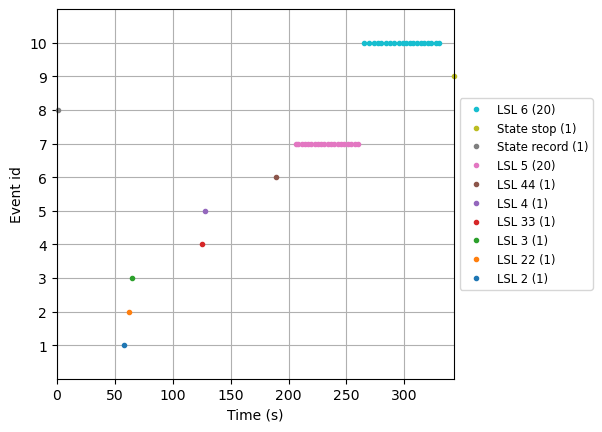


Alice succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Almaz_2022-10-06_15-44-35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 150999  =      0.000 ...   301.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annotati

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


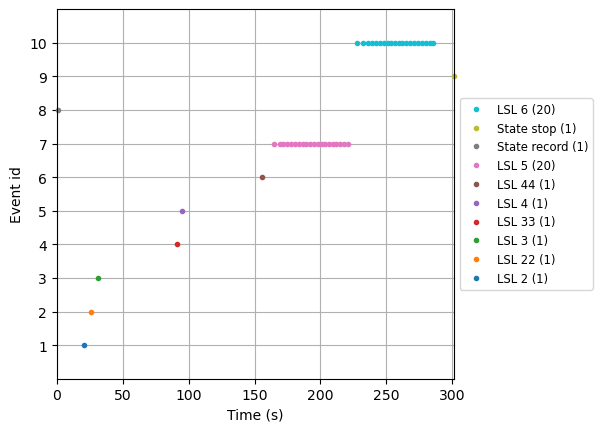


Almaz succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Misha_2022-10-04_15-01-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 204499  =      0.000 ...   408.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annotati

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


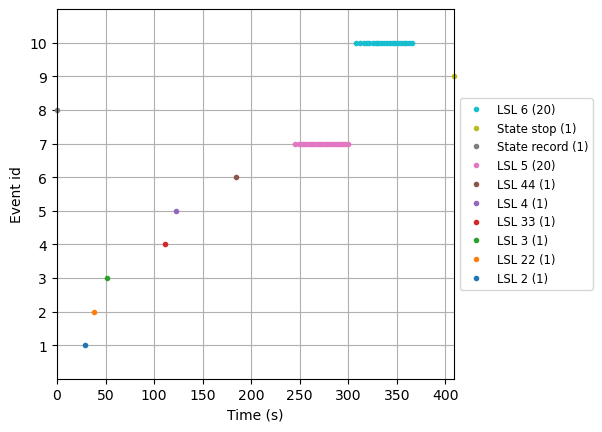


Misha succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\SashaGrinEEG_2022-10-04_17-38-14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 177499  =      0.000 ...   354.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used A

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


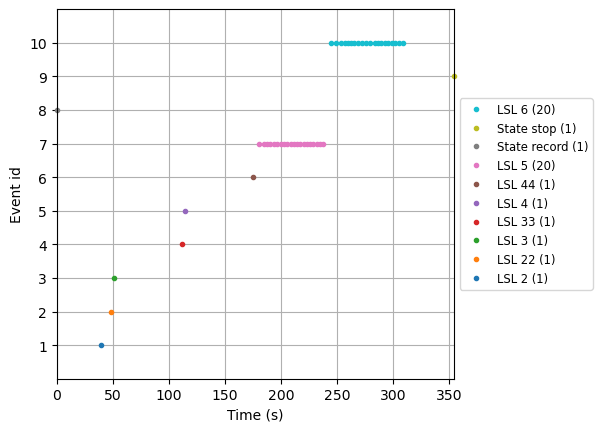


Sasha succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\SonyNVX_2022-09-29_17-50-06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147999  =      0.000 ...   295.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


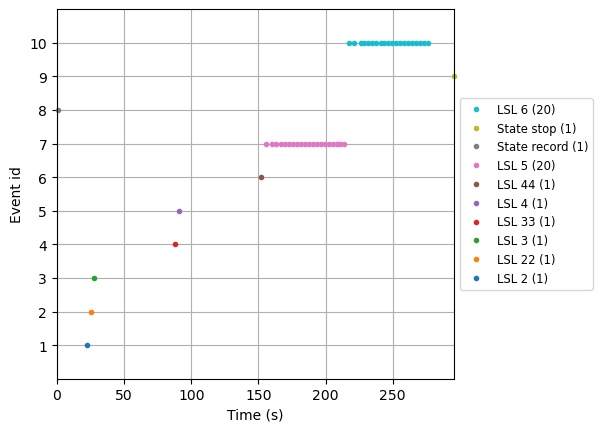


SonyN succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\NastyaNVX_2022-09-28_17-23-28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160999  =      0.000 ...   321.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Anno

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


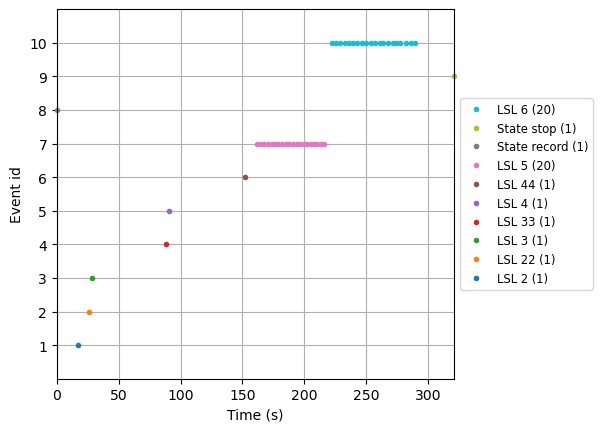


Nasty succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Pilugin-10-10_17-58-22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163999  =      0.000 ...   327.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annotations

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


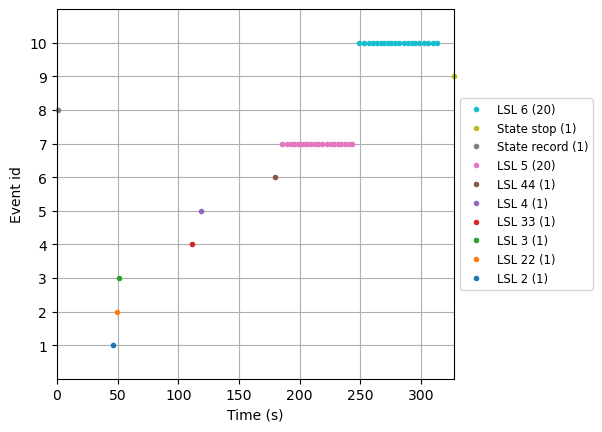


Pilug succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Kurkin_2022-10-10_18-59-15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154999  =      0.000 ...   309.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annotat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


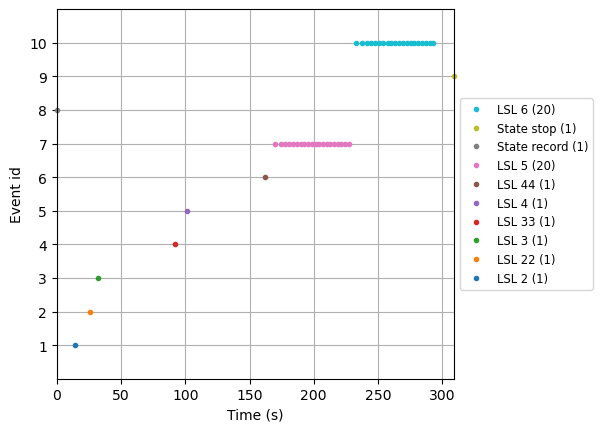


Kurki succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Koblova_2022-10-11_17-47-48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149499  =      0.000 ...   298.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


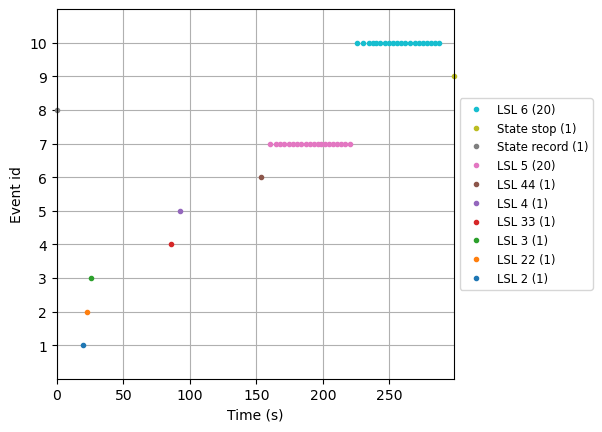


Koblo succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Baltsat_2022-10-11_10-36-50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147999  =      0.000 ...   295.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


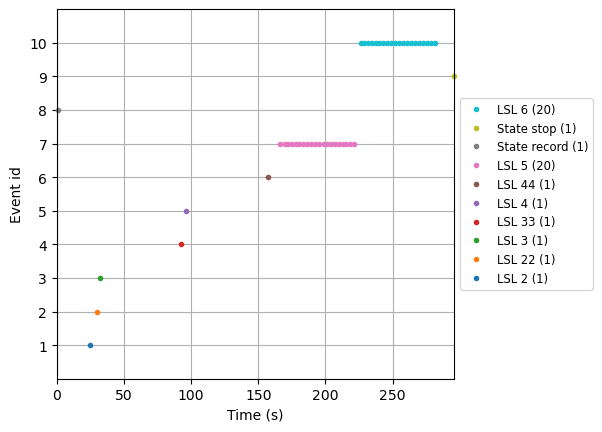


Balts succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Dolgikh_2022-10-11_12-13-54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 174999  =      0.000 ...   349.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


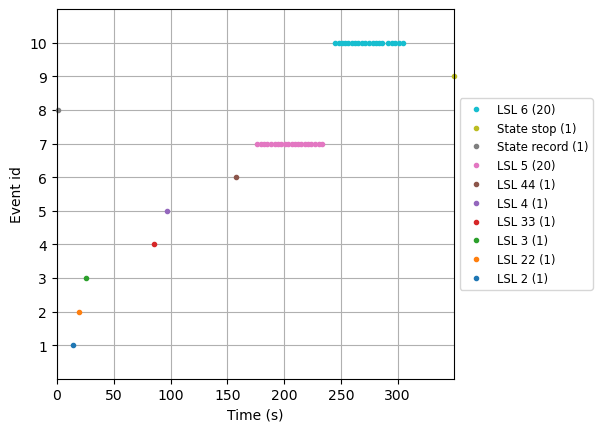


Dolgi succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Medvedeva_2022-10-11_15-05-08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194499  =      0.000 ...   388.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Anno

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


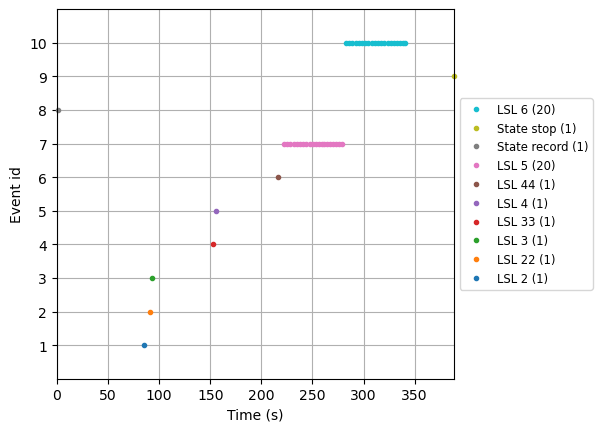


Medve succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Katya_2022-10-04_14-06-34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158999  =      0.000 ...   317.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Annotati

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


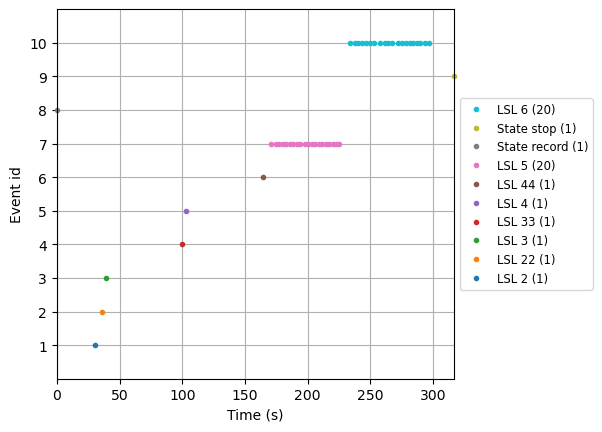


Katya succesful

Extracting EDF parameters from G:\.shortcut-targets-by-id\166Cp9_JW_szly6kshNpaIVJxZumVwx43\Easy EEG\Data\SeptemberOctober\nvx\Mosgovaya_2022-10-12_17-05-16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155499  =      0.000 ...   310.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Used Anno

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


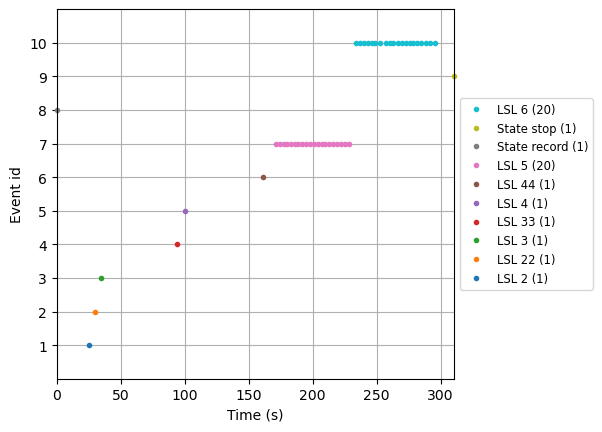


Mosgo succesful



{'Alice': <RawEDF | Alice_2022-10-06_13-49-53.edf, 10 x 172000 (344.0 s), ~13.1 MB, data loaded>,
 'Almaz': <RawEDF | Almaz_2022-10-06_15-44-35.edf, 10 x 151000 (302.0 s), ~11.5 MB, data loaded>,
 'Misha': <RawEDF | Misha_2022-10-04_15-01-10.edf, 10 x 204500 (409.0 s), ~15.6 MB, data loaded>,
 'Sasha': <RawEDF | SashaGrinEEG_2022-10-04_17-38-14.edf, 10 x 177500 (355.0 s), ~13.6 MB, data loaded>,
 'SonyN': <RawEDF | SonyNVX_2022-09-29_17-50-06.edf, 10 x 148000 (296.0 s), ~11.3 MB, data loaded>,
 'Nasty': <RawEDF | NastyaNVX_2022-09-28_17-23-28.edf, 10 x 161000 (322.0 s), ~12.3 MB, data loaded>,
 'Pilug': <RawEDF | Pilugin-10-10_17-58-22.edf, 10 x 164000 (328.0 s), ~12.5 MB, data loaded>,
 'Kurki': <RawEDF | Kurkin_2022-10-10_18-59-15.edf, 10 x 155000 (310.0 s), ~11.8 MB, data loaded>,
 'Koblo': <RawEDF | Koblova_2022-10-11_17-47-48.edf, 10 x 149500 (299.0 s), ~11.4 MB, data loaded>,
 'Balts': <RawEDF | Baltsat_2022-10-11_10-36-50.edf, 10 x 148000 (296.0 s), ~11.3 MB, data loaded>,
 'Dol

In [6]:
#создадим словари с ЭЭГ и с событиями по всем людям
path_dir = "G:\\.shortcut-targets-by-id\\166Cp9_JW_szly6kshNpaIVJxZumVwx43\\Easy EEG\\Data\\SeptemberOctober\\nvx"

dir_list = os.listdir(path_dir)
#dir_list.remove('desktop.ini')

dir_list = [i for i in dir_list if i[-3:]=='edf']

exclCh = ['Fpz', 'F7', 'F3', 'Fz', 'F4', 'F8', 'Ft7', 'Fc3', 'Fcz', 'Fc4', 'Ft8', 'Cz', 'Tp7', 'Cp3', 'Cpz', 'Cp4', 'Tp8', 'T5', 'P3', 'Pz', 'P4', 'T6', 'P5', 'Po3', 'Poz', 'Po4', 'P6', 'Po7', 'Oz', 'Po8', 'B1+', 'B1-', 'B2+', 'B2-', 'B3+', 'B3-', 'B4+', 'B4-', 'Aux1', 'Aux2', 'Aux3', 'Aux4']

raw_list = {}
events_list = {}
names=[]
chan=mne.channels.make_standard_montage('standard_1005') #Создаем переменну монтажа
for i in dir_list:
    patheeg = path_dir + '\\' + i
    name = i[:5]
    names.append(name)
    raw = mne.io.read_raw_edf(patheeg, exclude = exclCh)
    raw.set_montage(chan) #Добавляем к описанию нашей записи описание монтаж
    #raw.plot_sensors() #Посмотрим, как расположились наши электроды
    #plt.show()
    raw.pick(['all']).load_data()
    raw=raw.filter(1, 40,phase='zero-double') #фильтруем
    raw.set_eeg_reference(ref_channels=['A1', 'A2']) #устанавливаем референты
    raw_list[name] = raw
    ev = mne.events_from_annotations(raw)
    for i in range(27,47):
        ev[0][i][2] = 10
        ev[1]['LSL 6'] = 10
    events = ev[0]
    #raw.plot(events=events, event_id=ev[1])
    raw.load_data()
    fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp, event_id=ev[1])
    fig.subplots_adjust(right=0.7)
    events_list[name] = events
    text = '\n'+ name + " " + "succesful" + '\n'
    print(text)
raw_list

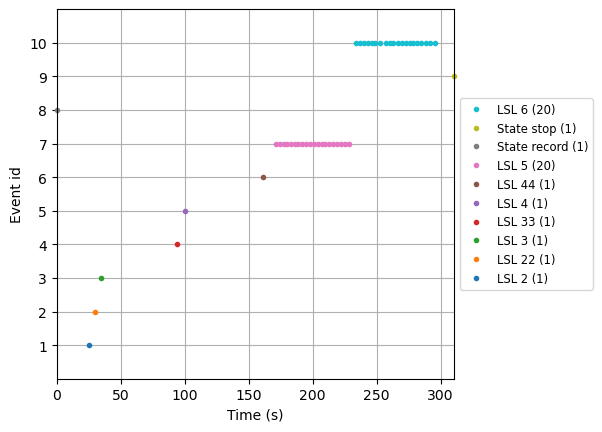

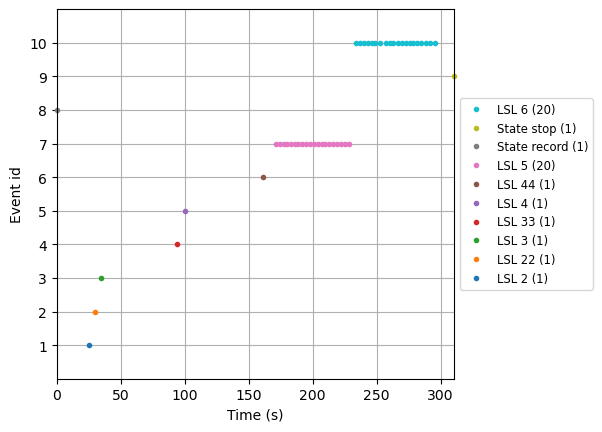

In [3]:
mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp, event_id=ev[1])

In [5]:
%matplotlib

Using matplotlib backend: QtAgg


### Kolmogorov-Smirnov: Blinking vs normal before ICA

In [5]:
#тут eo - открытые глаза, а ec - моргание
diff = 0
equa = 0
for i in names:
    print('\n', i, '\n')
    raw = raw_list[i]
    events = events_list[i]
    if events[3][2] == 3:
        eot1 = events[3][0] / raw.info['sfreq']
        eot2 = events[4][0] / raw.info['sfreq']
        print(eot1,eot2)
        raw_eo = raw.copy().crop(tmin=eot1, tmax=eot2)
    if events[1][2] == 1:
        ect1 = events[1][0] / raw.info['sfreq']
        ect2 = events[2][0] / raw.info['sfreq']
        print(ect1,ect2)
        raw_ec = raw.copy().crop(tmin=ect1, tmax=ect2)
    #raw_ec.plot(events=events)
    #raw_eo.plot(events=events)
    psd_ecl = raw_ec.compute_psd(picks=['Fp1','Fp2'],fmin=8,fmax=12)
    psd_ecl_lil = np.concatenate([psd_ecl._data[0], psd_ecl._data[1]])
    psd_eol = raw_eo.compute_psd(picks=['Fp1','Fp2'],fmin=8,fmax=12)
    psd_eol_lil = np.concatenate([psd_eol._data[0], psd_eol._data[1]])
    psd_ecl.plot()
    psd_eol.plot()
    ans1 = str(scipy.stats.kstest(psd_ecl_lil, psd_eol_lil))
    nbeg = ans1.rfind('e=')
    print(ans1)
    ans1 = ans1.replace("e", "E" )
    nbeg += 2
    nend = len(ans1) - 1
    p = float(ans1[nbeg:nend])
    p = round(p, 5)
    if p < 0.05:
        ans = 'different'
        diff += 1
    else:
        ans = 'equal'
        equa += 1
    print(p,ans,sep='\n')
print('total number of different:', diff)
print('total number of equal:', equa)


 Alice 

64.88 124.898
58.168 62.336
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Almaz 

30.99 90.984
20.812 26.08
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Misha 

51.45 111.46
28.314 38.492
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Sasha 

51.246 111.248
39.174 47.758
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 SonyN 

27.604 87.596
21.958 25.06
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Nasty 

28.544 88.526
17.264 25.642
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Pilug 

51.336 111.32
45.998 49.502
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Kurki 

31.688 91.696
13.99 25.78
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Koblo 

25.872 85.866
19.22 22.808
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Balts 

32.184 92.15
24.83 29.456
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Dolgi 

25.692 85.702
13.734 19.022
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\_mpl_figure.py:2083: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Medve 

92.832 152.858
84.83 90.556
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Katya 

39.438 99.46
30.314 35.748
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different
total number of different: 13
total number of equal: 0


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


### ICA

In [25]:
#for i in names:
 #   print('\n', i, '\n')
  #  # set up and fit the ICA
   # raw = raw_list[i]
    #ica = mne.preprocessing.ICA(n_components=6, random_state=97, max_iter=800)
   # ica.fit(raw, picks='all')
   # ica.plot_properties(raw, picks=[0,1,2,3,4,5])

In [8]:
names

['Alice',
 'Almaz',
 'Misha',
 'Sasha',
 'SonyN',
 'Nasty',
 'Pilug',
 'Kurki',
 'Koblo',
 'Balts',
 'Dolgi',
 'Medve',
 'Katya',
 'Mosgo']


 Alice 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 1.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
172 matching events found
No baseline correction applied
0 projection items activated


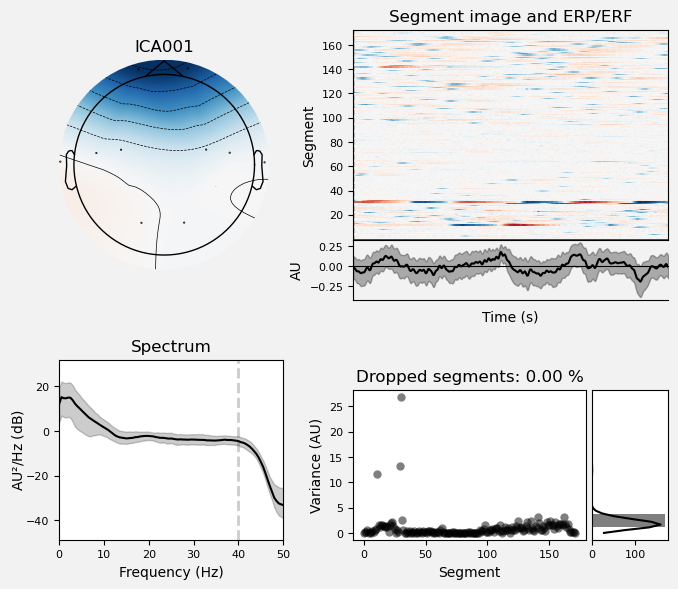

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Almaz 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
151 matching events found
No baseline correction applied
0 projection items activated


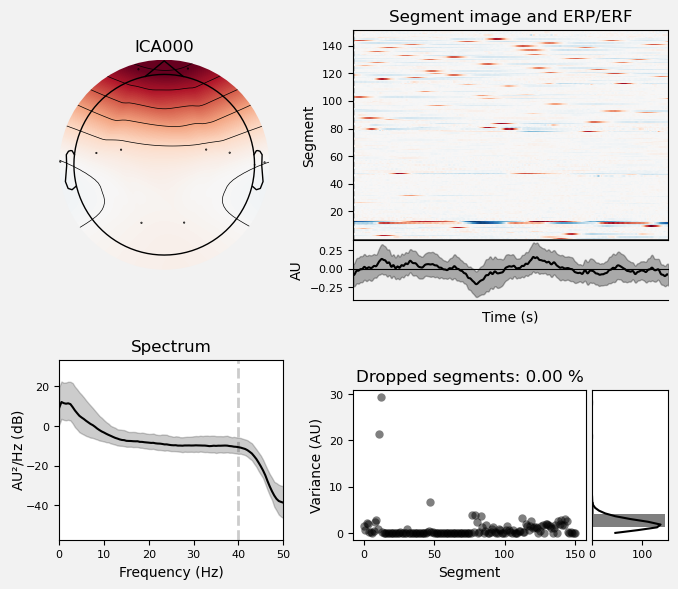

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Misha 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
204 matching events found
No baseline correction applied
0 projection items activated


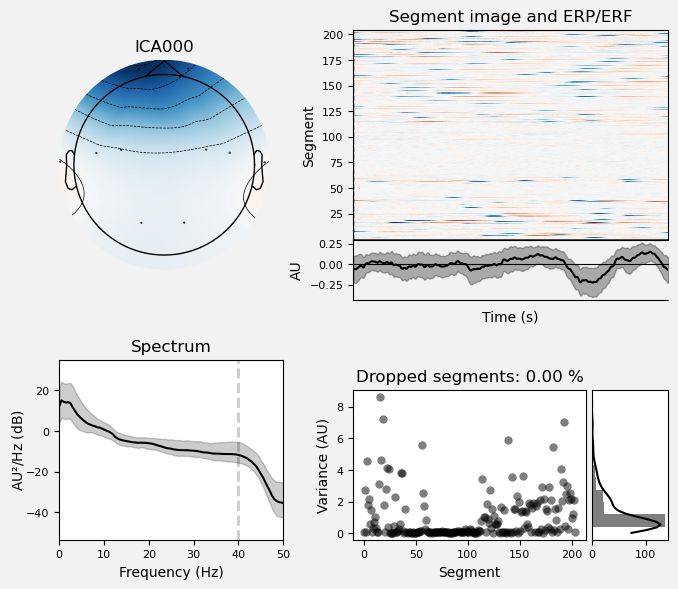

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Sasha 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
177 matching events found
No baseline correction applied
0 projection items activated


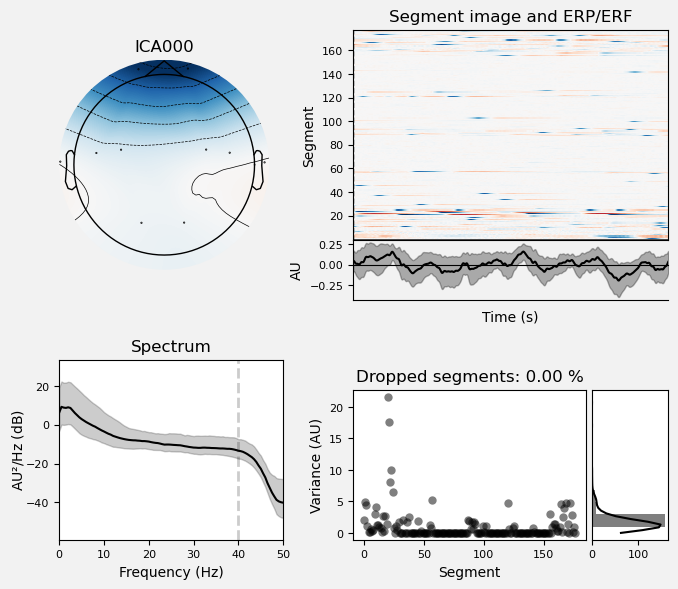

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 SonyN 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated


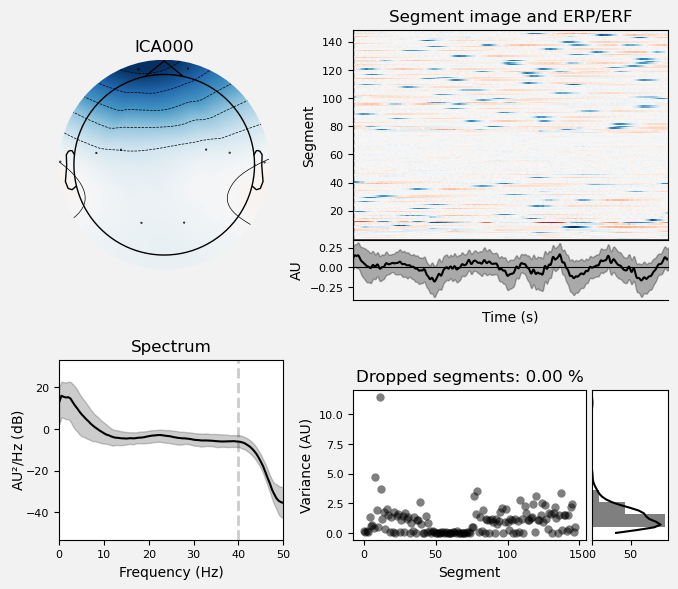

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Nasty 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
161 matching events found
No baseline correction applied
0 projection items activated


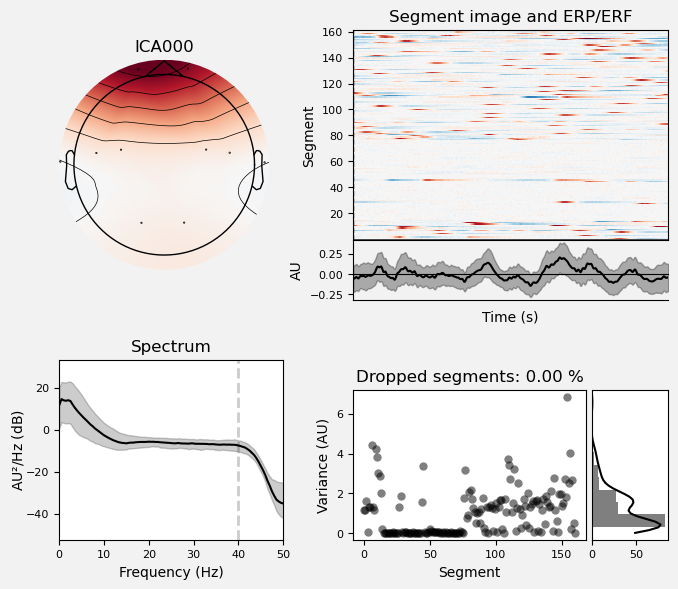

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Pilug 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
164 matching events found
No baseline correction applied
0 projection items activated


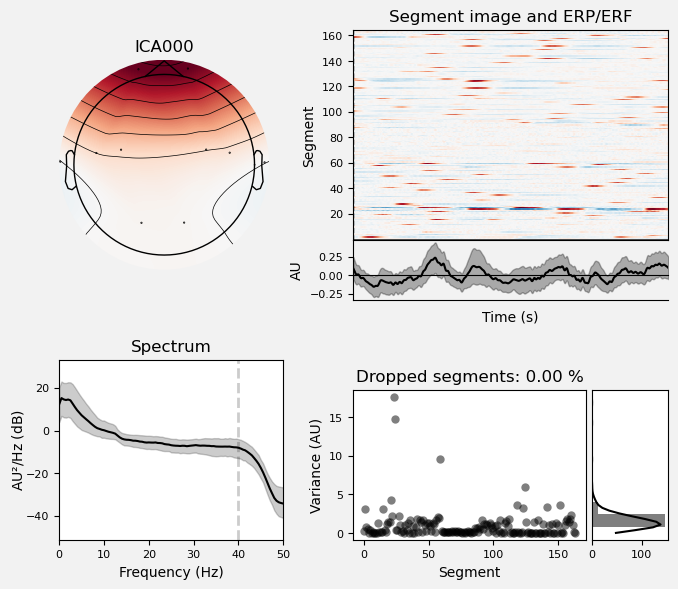

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Kurki 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.6s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
155 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
155 matching events found
No baseline correction applied
0 projection items activated


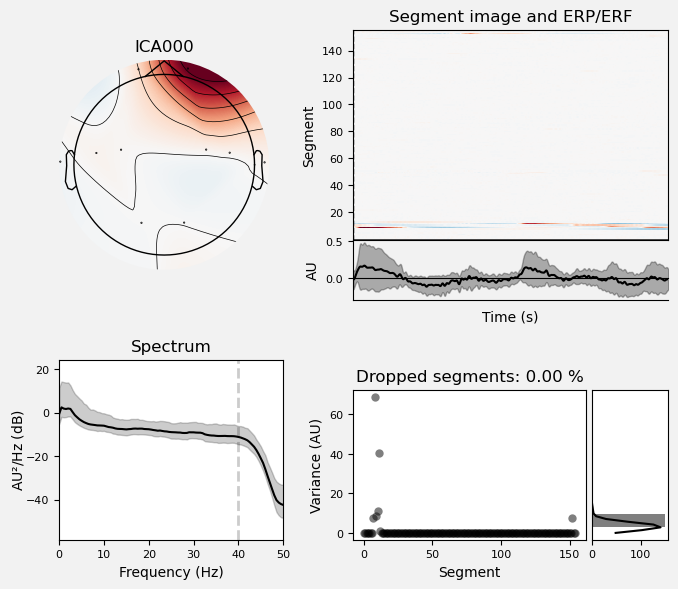

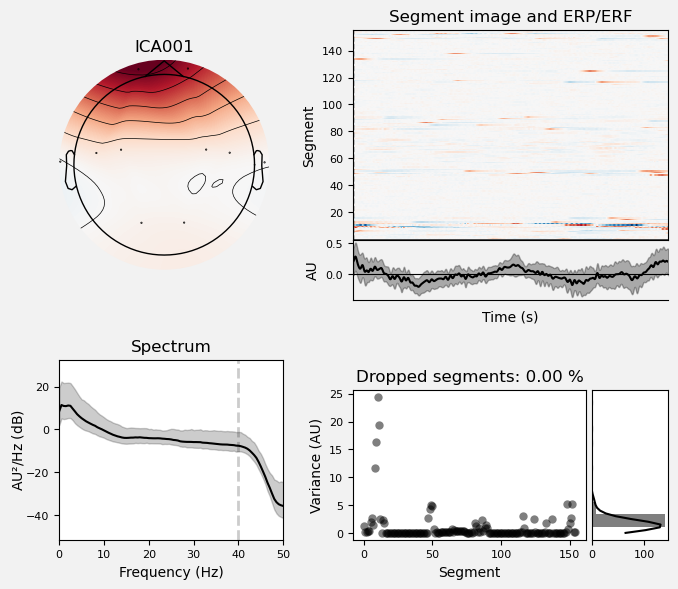

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 2 ICA components
    Projecting back using 10 PCA components

 Koblo 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated


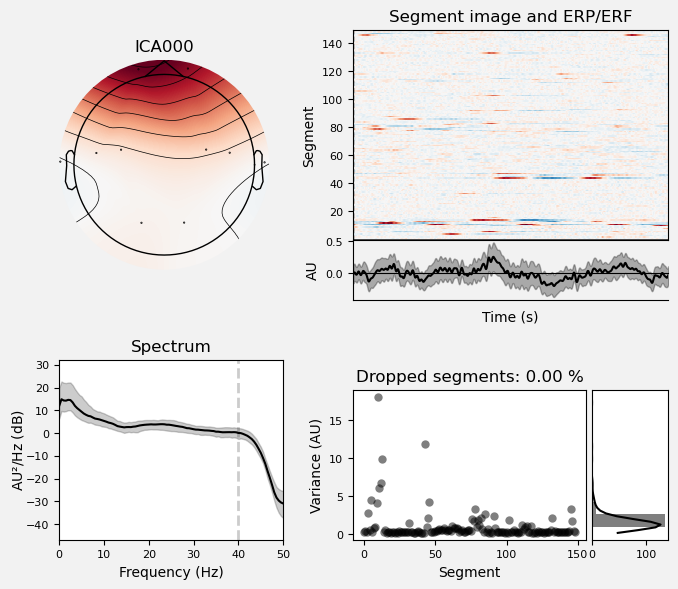

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Balts 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated


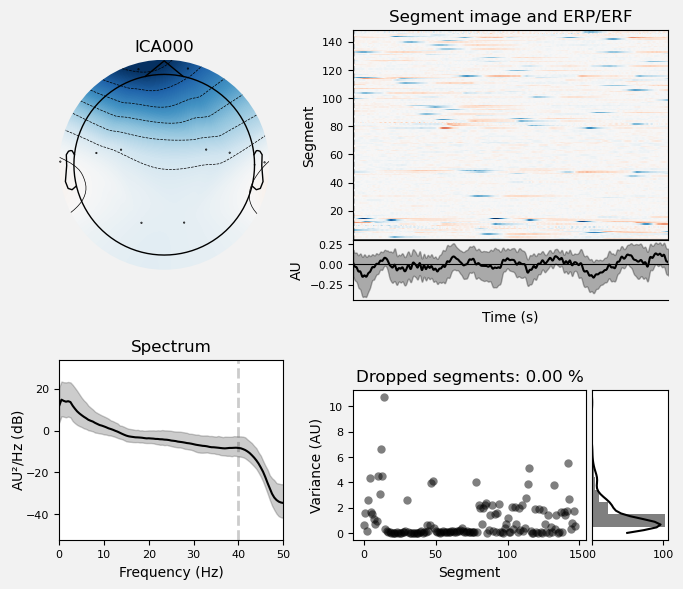

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Dolgi 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
175 matching events found
No baseline correction applied
0 projection items activated


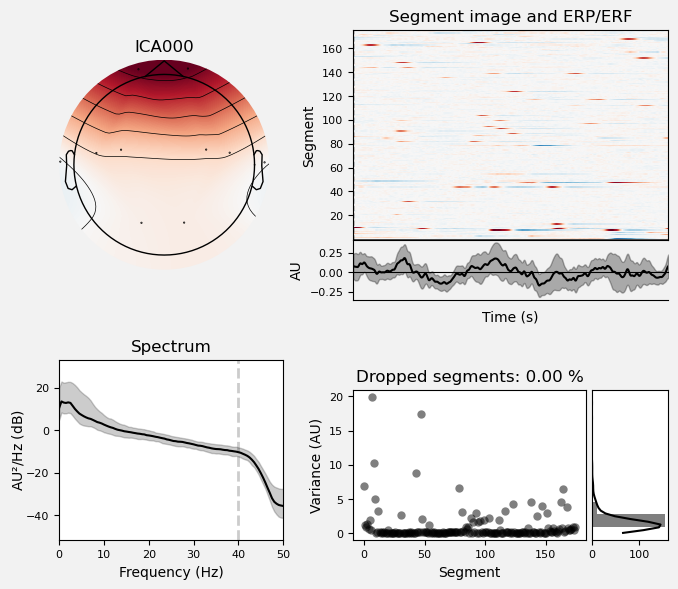

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Medve 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.8s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
194 matching events found
No baseline correction applied
0 projection items activated


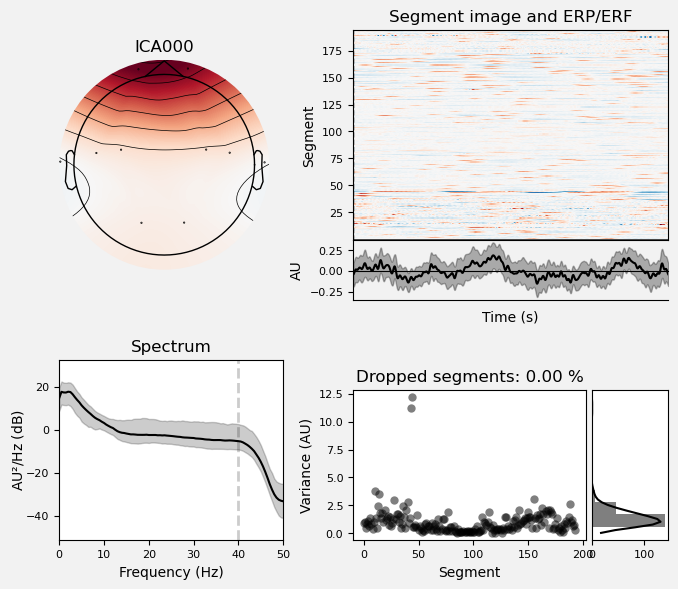

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Katya 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
159 matching events found
No baseline correction applied
0 projection items activated


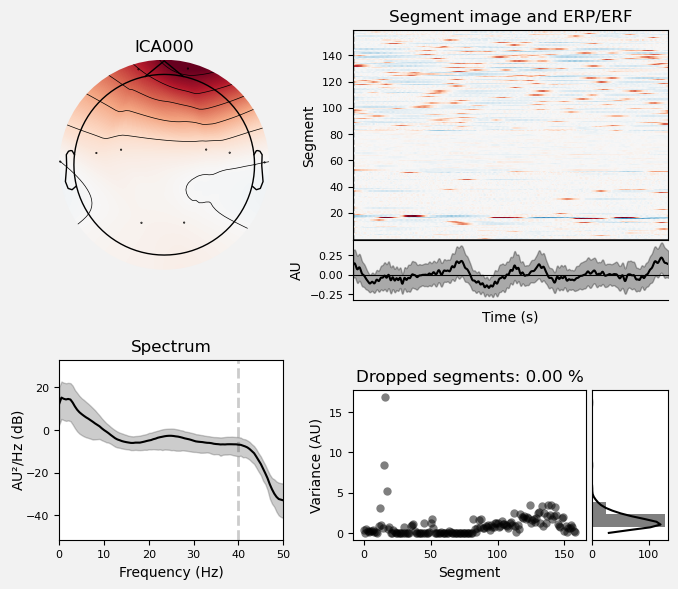

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components

 Mosgo 

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
155 matching events found
No baseline correction applied
0 projection items activated


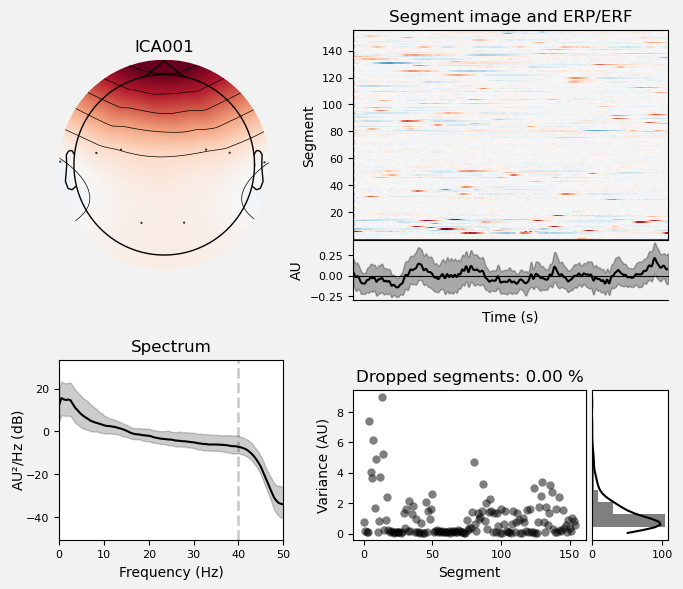

Applying ICA to Raw instance
    Transforming to ICA space (6 components)
    Zeroing out 1 ICA component
    Projecting back using 10 PCA components


In [10]:
for i in names:
    print('\n', i, '\n')
    # set up and fit the ICA
    raw = raw_list[i]
    ica = mne.preprocessing.ICA(n_components=6, random_state=97, max_iter=800)
    ica.fit(raw, picks='all')
    #ica.plot_properties(raw, picks=[0,1,2,3,4,5])
    if (i == 'Alice') or (i == 'Mosgo'):
        ica.exclude = [1]
    elif i == 'Kurki':
        ica.exclude = [0, 1]
    else:
        ica.exclude = [0]
    ica.plot_properties(raw, picks=ica.exclude)
    ica.apply(raw)

## plot psd

In [8]:
import math

%matplotlib

psd = {}
#ec
for i in names:
    raw = raw_list[i]
    events = events_list[i]
    if events[5][2] == 5:
        ect1 = events[5][0] / raw.info['sfreq']
        ect2 = events[6][0] / raw.info['sfreq']
        print(ect1,ect2)
        raw_ec = raw.copy().crop(tmin=ect1, tmax=ect2)
        psd_ec = raw_ec.compute_psd(picks=['O1'],fmin=0, fmax=60)
        psd_ec = psd_ec.get_data(return_freqs=True)
    yy_ec = psd_ec[0][0]
    x_ec = psd_ec[1]
    y_ec = []
    for i in range(len(yy_ec)):
        n = (yy_ec[i] ** 2) / x_ec[i]
        n = math.log(n,10)
        y_ec.append(n)
    plt.plot(x_ec,y_ec)
    
    




Using matplotlib backend: QtAgg
127.962 188.952
Effective window size : 0.512 (s)
94.536 155.532
Effective window size : 0.512 (s)
122.95 183.948
Effective window size : 0.512 (s)
114.108 175.102
Effective window size : 0.512 (s)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32908\4208995165.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  n = (yy_ec[i] ** 2) / x_ec[i]


90.748 151.764
Effective window size : 0.512 (s)
90.938 151.904
Effective window size : 0.512 (s)
118.864 179.82
Effective window size : 0.512 (s)
101.32 162.318
Effective window size : 0.512 (s)
92.55 153.568
Effective window size : 0.512 (s)
96.102 157.11
Effective window size : 0.512 (s)
96.604 157.56
Effective window size : 0.512 (s)
155.35 216.344
Effective window size : 0.512 (s)
103.342 164.298
Effective window size : 0.512 (s)


In [14]:
#eo
for i in names:
    raw = raw_list[i]
    events = events_list[i]
    if events[3][2] == 3:
        eot1 = events[3][0] / raw.info['sfreq']
        eot2 = events[4][0] / raw.info['sfreq']
        print(eot1,eot2)
        raw_eo = raw.copy().crop(tmin=eot1, tmax=eot2)
        psd_eo = raw_eo.compute_psd(picks=['O1'],fmin=0, fmax=60)
        psd_eo = psd_eo.get_data(return_freqs=True)
    #for ec
    yy_eo = psd_eo[0][0]
    x_eo = psd_eo[1]
    y_eo = []
    for i in range(len(yy_eo)):
        if x_eo[i] == 0:
            x_eo[i] = 0.1
        n = (yy_eo[i] ** 2) / x_eo[i]
        n = math.log(n,10)
        y_eo.append(n)
    plt.plot(x_eo,y_eo)


64.88 124.898
Effective window size : 0.512 (s)
30.99 90.984
Effective window size : 0.512 (s)
51.45 111.46
Effective window size : 0.512 (s)
51.246 111.248
Effective window size : 0.512 (s)
27.604 87.596
Effective window size : 0.512 (s)
28.544 88.526
Effective window size : 0.512 (s)
51.336 111.32
Effective window size : 0.512 (s)
31.688 91.696
Effective window size : 0.512 (s)
25.872 85.866
Effective window size : 0.512 (s)
32.184 92.15
Effective window size : 0.512 (s)
25.692 85.702
Effective window size : 0.512 (s)
92.832 152.858
Effective window size : 0.512 (s)
39.438 99.46
Effective window size : 0.512 (s)


In [11]:
#1b
for i in names:
    raw = raw_list[i]
    events = events_list[i]
    if (events[7][2] == 7) and (events[26][2] == 7):
        e1t1 = events[7][0] / raw.info['sfreq']
        e1t2 = events[26][0] / raw.info['sfreq']
        print(e1t1,e1t2)
        raw_e1 = raw.copy().crop(tmin=e1t1, tmax=e1t2)
        psd_e1 = raw_e1.compute_psd(picks=['O1'],fmin=0, fmax=60)
        psd_e1 = psd_e1.get_data(return_freqs=True)
    #for 1 back
    yy_e1 = psd_e1[0][0]
    x_e1 = psd_e1[1]
    y_e1 = []
    for i in range(len(yy_e1)):
        if x_e1[i] == 0:
            x_e1[i] = 0.1
        n = (yy_e1[i] ** 2) / x_e1[i]
        n = math.log(n,10)
        y_e1.append(n)
    plt.plot(x_e1,y_e1)



206.198 260.038
Effective window size : 0.512 (s)
164.81 220.614
Effective window size : 0.512 (s)
244.908 300.01
Effective window size : 0.512 (s)
180.054 237.328
Effective window size : 0.512 (s)
155.564 213.862
Effective window size : 0.512 (s)
162.116 216.222
Effective window size : 0.512 (s)
185.484 243.306
Effective window size : 0.512 (s)
170.06 227.128
Effective window size : 0.512 (s)
160.206 220.136
Effective window size : 0.512 (s)
166.28 221.254
Effective window size : 0.512 (s)
176.152 233.342
Effective window size : 0.512 (s)
222.528 279.066
Effective window size : 0.512 (s)
171.16 225.498
Effective window size : 0.512 (s)


In [13]:
#2b
for i in names:
    raw = raw_list[i]
    events = events_list[i]
    if (events[27][2] == 10) and (events[46][2] == 10):
        e1t1 = events[27][0] / raw.info['sfreq']
        e1t2 = events[46][0] / raw.info['sfreq']
        print(e1t1,e1t2)
        raw_e1 = raw.copy().crop(tmin=e1t1, tmax=e1t2)
        psd_e1 = raw_e1.compute_psd(picks=['O1'],fmin=0, fmax=60)
        psd_e1 = psd_e1.get_data(return_freqs=True)
    #for 1 back
    yy_e1 = psd_e1[0][0]
    x_e1 = psd_e1[1]
    y_e1 = []
    for i in range(len(yy_e1)):
        if x_e1[i] == 0:
            x_e1[i] = 0.1
        n = (yy_e1[i] ** 2) / x_e1[i]
        n = math.log(n,10)
        y_e1.append(n)
    plt.plot(x_e1,y_e1)

265.39 330.262
Effective window size : 0.512 (s)
227.67 285.66
Effective window size : 0.512 (s)
307.488 365.248
Effective window size : 0.512 (s)
244.604 308.338
Effective window size : 0.512 (s)
217.662 276.4
Effective window size : 0.512 (s)
222.19 289.288
Effective window size : 0.512 (s)
248.444 313.418
Effective window size : 0.512 (s)
233.196 292.954
Effective window size : 0.512 (s)
225.886 287.37
Effective window size : 0.512 (s)
226.224 281.548
Effective window size : 0.512 (s)
245.062 304.59
Effective window size : 0.512 (s)
283.188 340.99
Effective window size : 0.512 (s)
234.048 297.176
Effective window size : 0.512 (s)


### save raw eeg

In [6]:
#save filtered eeg
for i in names:
    print('\n', i, '\n')
    # set up and fit the ICA
    raw = raw_list[i]
    name = 'C:\\Users\\Lenovo\\1easyEEG\\eeg_raw\\' + i + "_nvx_" + "raw.fif"
    print(name)
    raw.save(name)


 Alice 

C:\Users\Lenovo\1easyEEG\eeg_raw\Alice_nvx_raw.fif
Writing C:\Users\Lenovo\1easyEEG\eeg_raw\Alice_nvx_raw.fif
Closing C:\Users\Lenovo\1easyEEG\eeg_raw\Alice_nvx_raw.fif
[done]

 Almaz 

C:\Users\Lenovo\1easyEEG\eeg_raw\Almaz_nvx_raw.fif
Writing C:\Users\Lenovo\1easyEEG\eeg_raw\Almaz_nvx_raw.fif
Closing C:\Users\Lenovo\1easyEEG\eeg_raw\Almaz_nvx_raw.fif
[done]

 Misha 

C:\Users\Lenovo\1easyEEG\eeg_raw\Misha_nvx_raw.fif
Writing C:\Users\Lenovo\1easyEEG\eeg_raw\Misha_nvx_raw.fif
Closing C:\Users\Lenovo\1easyEEG\eeg_raw\Misha_nvx_raw.fif
[done]

 Sasha 

C:\Users\Lenovo\1easyEEG\eeg_raw\Sasha_nvx_raw.fif
Writing C:\Users\Lenovo\1easyEEG\eeg_raw\Sasha_nvx_raw.fif
Closing C:\Users\Lenovo\1easyEEG\eeg_raw\Sasha_nvx_raw.fif
[done]

 SonyN 

C:\Users\Lenovo\1easyEEG\eeg_raw\SonyN_nvx_raw.fif
Writing C:\Users\Lenovo\1easyEEG\eeg_raw\SonyN_nvx_raw.fif
Closing C:\Users\Lenovo\1easyEEG\eeg_raw\SonyN_nvx_raw.fif
[done]

 Nasty 

C:\Users\Lenovo\1easyEEG\eeg_raw\Nasty_nvx_raw.fif
Writing C


 Mosgo 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Mosgo_nvx_eve.npy


In [7]:
#save events
for i in names:
    print('\n', i, '\n')
    eve = events_list[i]
    name = 'C:\\Users\\Lenovo\\1easyEEG\\eeg_raw\\events\\' + i + "_nvx_" + "eve.npy"
    print(name)
    np.save(name, eve)


 Alice 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Alice_nvx_eve.npy

 Almaz 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Almaz_nvx_eve.npy

 Misha 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Misha_nvx_eve.npy

 Sasha 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Sasha_nvx_eve.npy

 SonyN 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\SonyN_nvx_eve.npy

 Nasty 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Nasty_nvx_eve.npy

 Pilug 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Pilug_nvx_eve.npy

 Kurki 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Kurki_nvx_eve.npy

 Koblo 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Koblo_nvx_eve.npy

 Balts 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Balts_nvx_eve.npy

 Dolgi 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Dolgi_nvx_eve.npy

 Medve 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Medve_nvx_eve.npy

 Katya 

C:\Users\Lenovo\1easyEEG\eeg_raw\events\Katya_nvx_eve.npy


## Classification csp + lda


 Alice 

Not setting metadata
40 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 1101 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 8 dim * 1e+10  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.2e-05 (2.2e-16 eps * 8 dim * 1.2e+10  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 8 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 8
    MAG: 

Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-06 (2.2e-16 eps * 8 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 8 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 8 dim * 3.8e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 8 dim * 6.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 8 dim * 5e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 8 dim * 6.7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 8 dim * 7e+09 

Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
--------------------------------------/////////////////////////////////------------------------------------------------------///////////////////////////////-----------
[0.625 0.25  0.5   0.25  0.125 0.375 0.375 0.625 0.375 0.375]
0.3875

 SonyN 

Not setting metadata
40 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 1101 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 8 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 8 dim * 1.2e+10  max singular value)
    Estima

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 8 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 8 dim * 7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 8 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 8 dim * 6.3e+0

Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-06 (2.2e-16 eps * 8 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 8 dim * 5.7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-06 (2.2e-16 eps * 8 dim * 4.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.4e-0

Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-06 (2.2e-16 eps * 8 dim * 4.3e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
--------------------------------------/////////////////////////////////------------------------------------------------------///////////////////////////////-----------
[0.375 0.125 0.    0.375 0.    0.25  0.375 0.5   0.375 0.375]
0.275

 Koblo 

Not setting metadata
40 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 1101 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 5.8e-06 (2.2e-16 eps * 8 dim * 3.3e+09  max singular value)
    Estimat

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 8 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 8 dim * 8e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-06 (2.2e-16 eps * 8 dim * 4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 8 dim * 7.6e+09 

Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.4e-06 (2.2e-16 eps * 8 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-06 (2.2e-16 eps * 8 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.4e-06 (2.2e-16 eps * 8 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e

Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 8 dim * 7.7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
--------------------------------------/////////////////////////////////------------------------------------------------------///////////////////////////////-----------
[0.875 0.625 1.    0.75  0.625 0.875 0.875 0.75  0.625 0.75 ]
0.775

 Katya 

Not setting metadata
40 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying basel

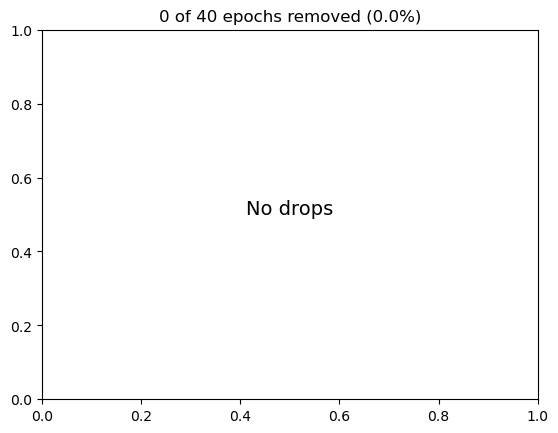

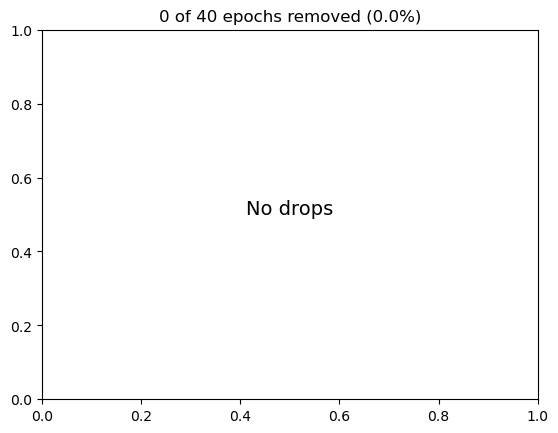

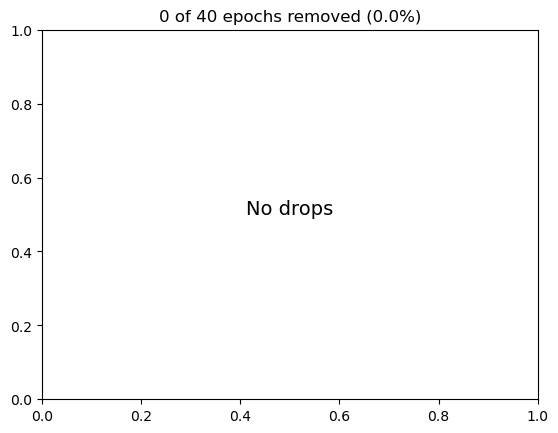

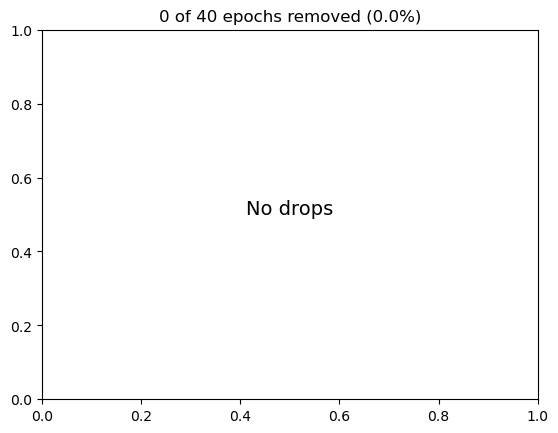

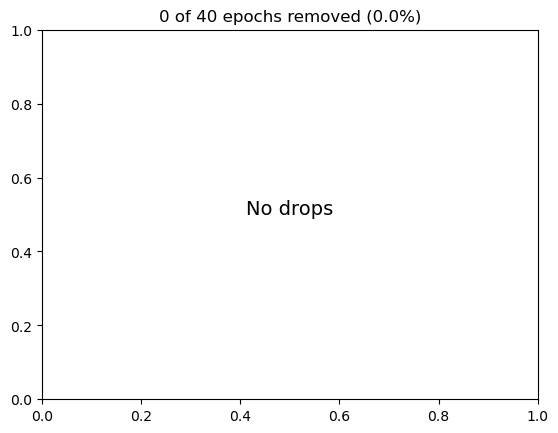

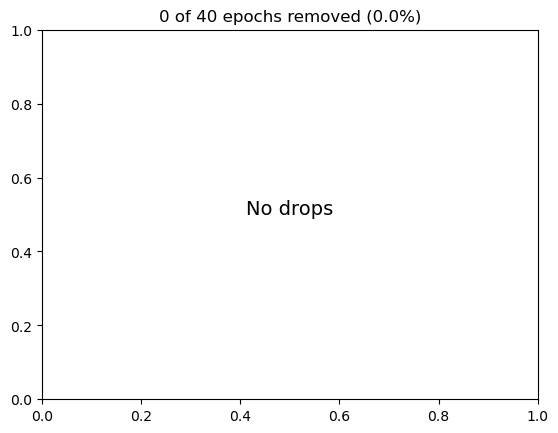

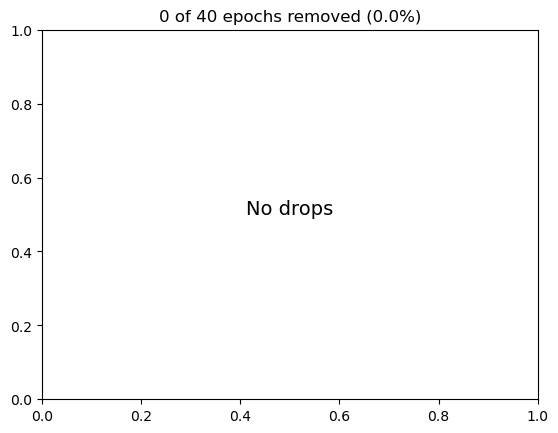

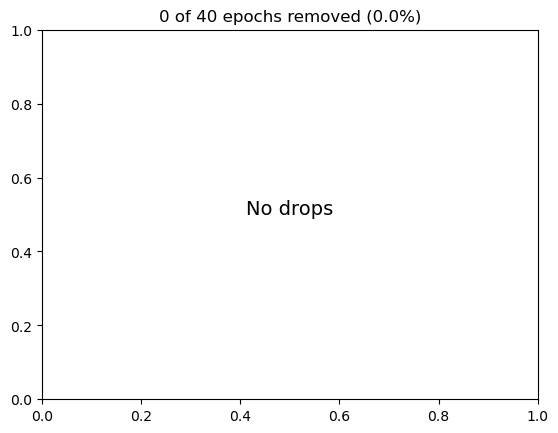

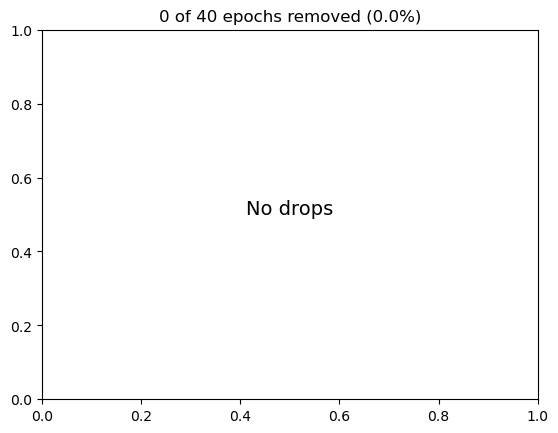

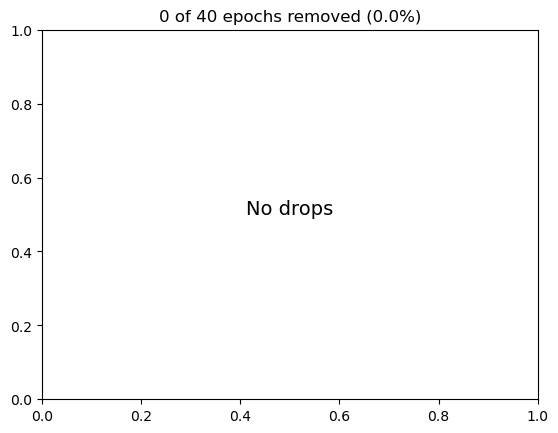

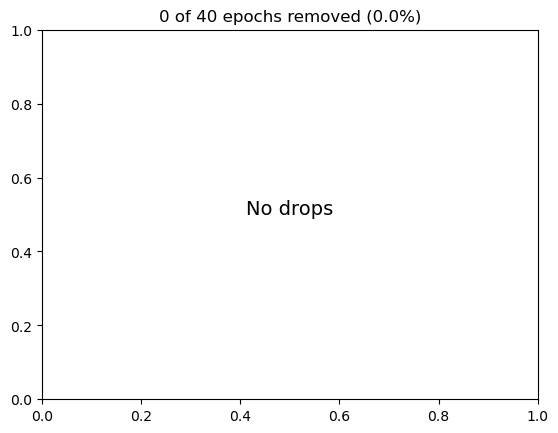

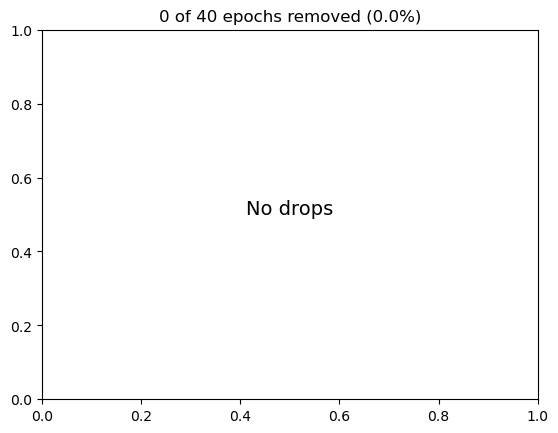

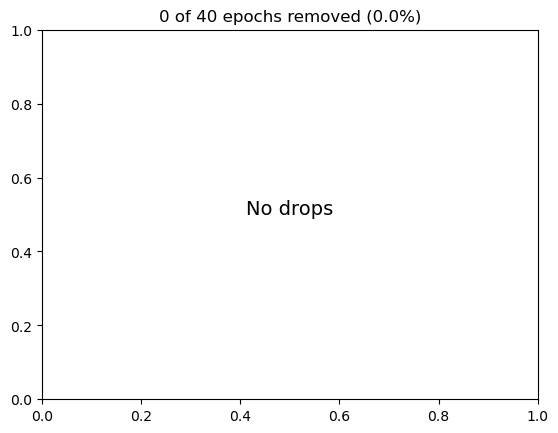

In [15]:
mm = []
n = 0
event_dict1 = {'1-back': 7, '2-back': 10}
for i in names:
    print('\n', i, '\n')
    raw = raw_list[i]
    events = events_list[i]
    events1 = events[7:]
    epo=mne.Epochs(raw,events1, event_id=event_dict1, tmin= -0.2, tmax=2, preload=True,picks=['O1','O2','Fp1','Fp2','T3','T4', 'C4', 'C3'],reject=None)
    epo.plot_drop_log()
    epo.plot()
    #oneb = epo['1-back'].average(picks=['F3','F4'])
    #twob = epo['2-back'].average(picks=['F3','F4'])
    #fig1 = oneb.plot()
    #fig2 = twob.plot(spatial_colors=True)
    scores = []
    epochs_data = epo.get_data()
    cv = ShuffleSplit(10, test_size=0.2, random_state=42)
    cv_split = cv.split(epochs_data)
    
    lda = LinearDiscriminantAnalysis() #Создаеим объект модели классификации
    csp = CSP(n_components=5, log=True, norm_trace=False) #Создаем объект CSP, который будет выделить 3 компонента
    labels = epo.events[:, -1]


    clf = Pipeline([('CSP', csp), ('LDA', lda)])# Идея данного оьъекта это объединить два объекта в жва блока последовательных преобразований

    scores = cross_val_score(clf, epochs_data, labels, cv=cv, n_jobs=1, verbose=False)
    print('--------------------------------------/////////////////////////////////------------------------------------------------------///////////////////////////////-----------')
    print(scores)
    
    n += np.count_nonzero(np.isnan(scores))
    
    cleanedList = [x for x in scores if str(x) != 'nan']
    print(statistics.mean(cleanedList))
    mm.append(statistics.mean(cleanedList))

In [16]:
#средние результаты по каждому испытуемому и по всем испытуемым
print(mm)
print(statistics.mean(mm))

[0.95, 0.7125, 0.45, 0.3875, 0.6125, 0.625, 0.8625, 0.275, 0.6125, 0.55, 0.5875, 0.775, 0.7875]
0.6298076923076923


## ClumpsyClassificationWithTunung

In [17]:
def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)

Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
shapes:
(40, 8, 1101) (40,) (40,)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nAliceResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.9
Best parameters:
{'classifier__C': 0.5}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 11

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nAlmazResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.78
Best parameters:
{'classifier__C': 0.05}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nMishaResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.58
Best parameters:
{'classifier__C': 3}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 110

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nSashaResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.4999999999999999
Best parameters:
{'classifier__C': 3}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nSonyNResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.56
Best parameters:
{'classifier__C': 0.1}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nNastyResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.8
Best parameters:
{'classifier__C': 4}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nPilugResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.76
Best parameters:
{'classifier__C': 0.5}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nKurkiResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.4
Best parameters:
{'classifier__C': 4}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nKobloResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.6599999999999999
Best parameters:
{'classifier__C': 3}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nBaltsResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.74
Best parameters:
{'classifier__C': 1}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 110

C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\epochs.py:619: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nDolgiResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.52
Best parameters:
{'classifier__C': 0.01}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nMedveResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.78
Best parameters:
{'classifier__C': 0.1}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
20 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26888\3299629906.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/40 [00:00<?, ?it/s]

/n/nKatyaResults/n
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Best score:
0.5399999999999999
Best parameters:
{'classifier__C': 0.01}
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________


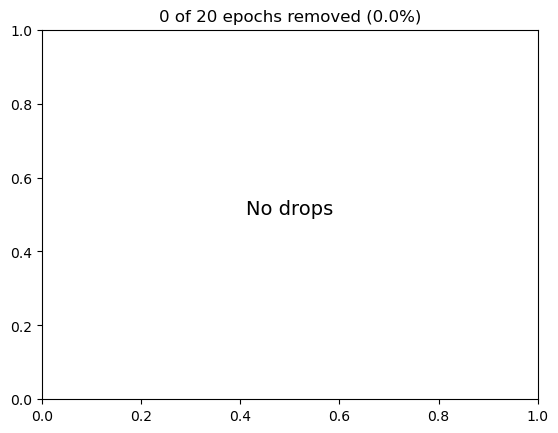

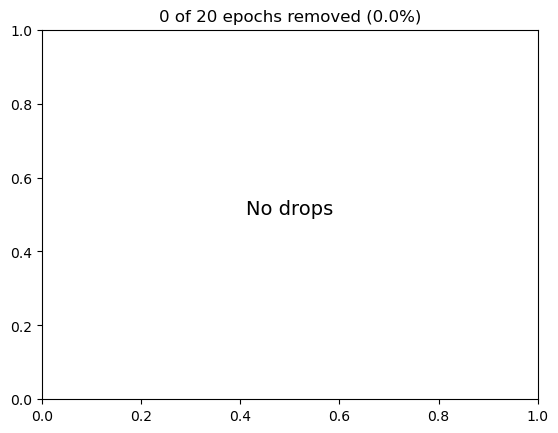

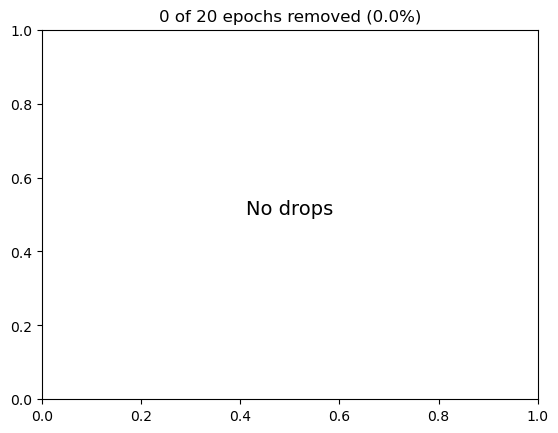

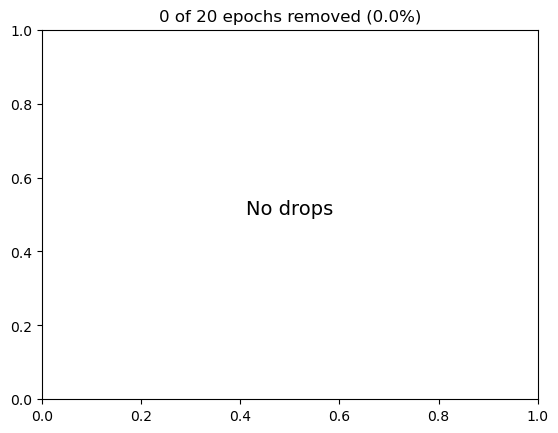

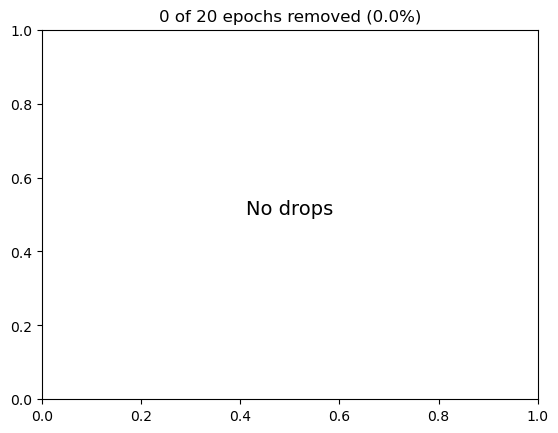

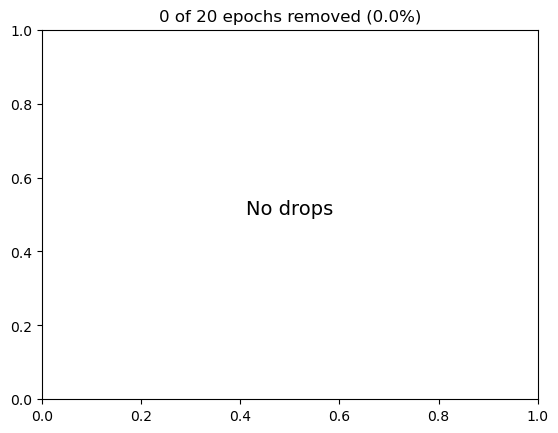

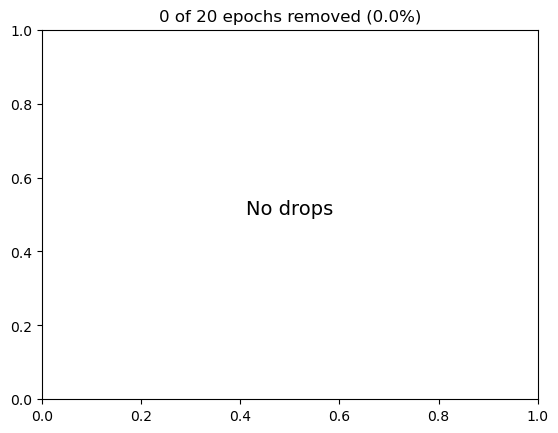

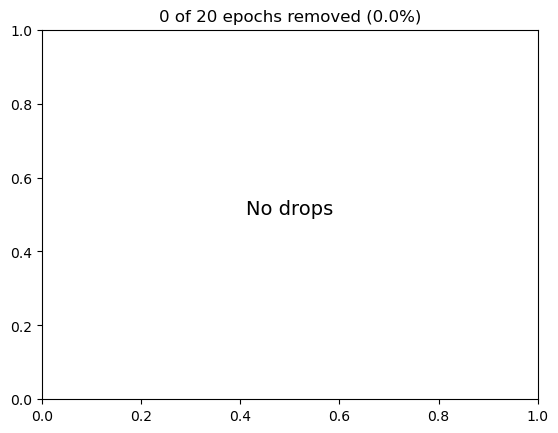

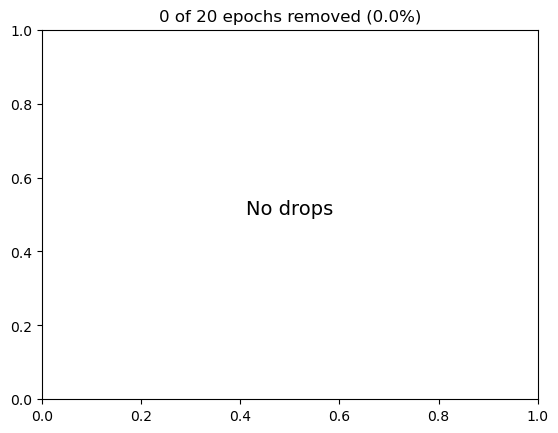

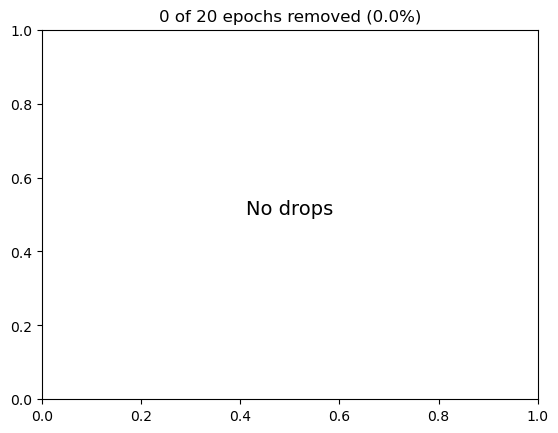

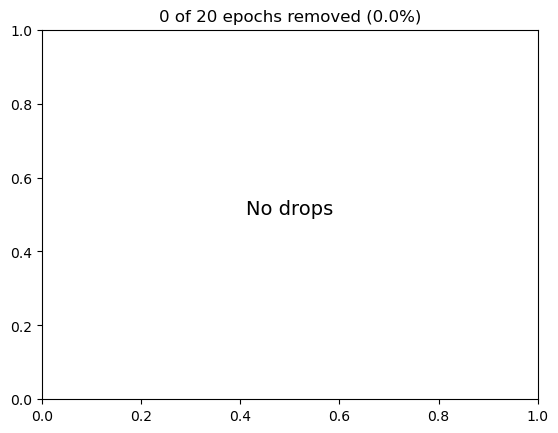

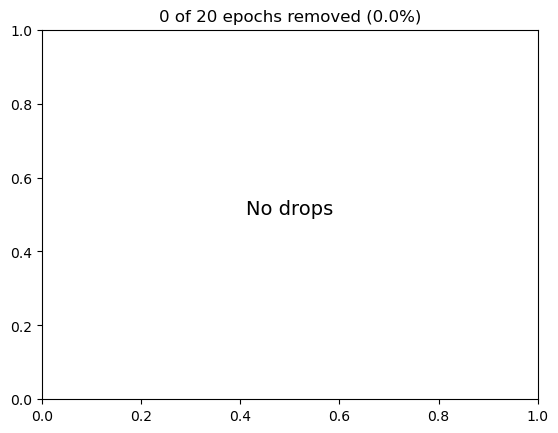

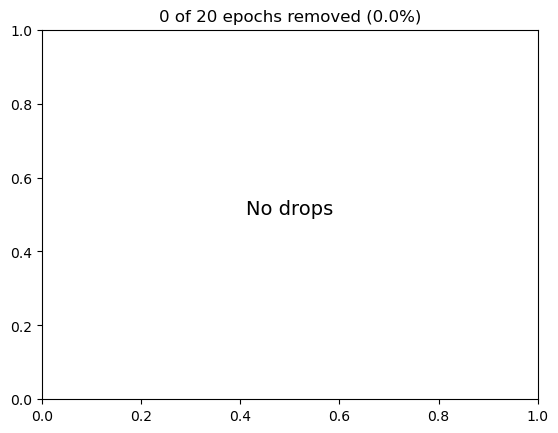

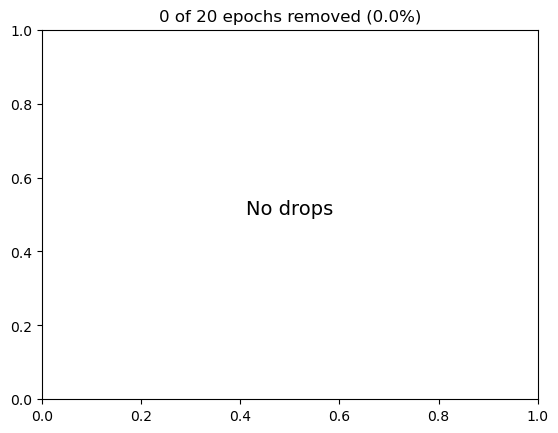

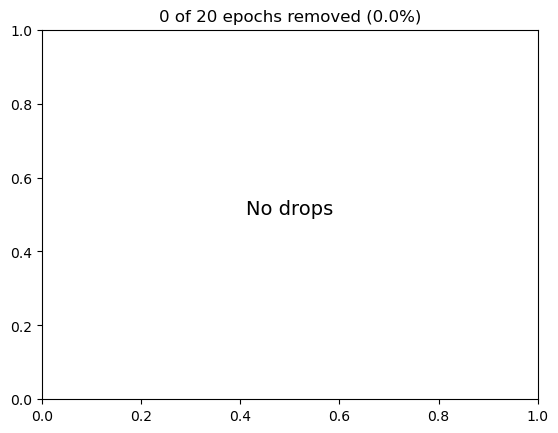

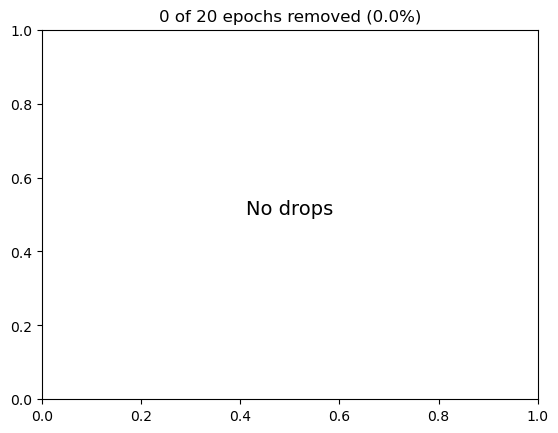

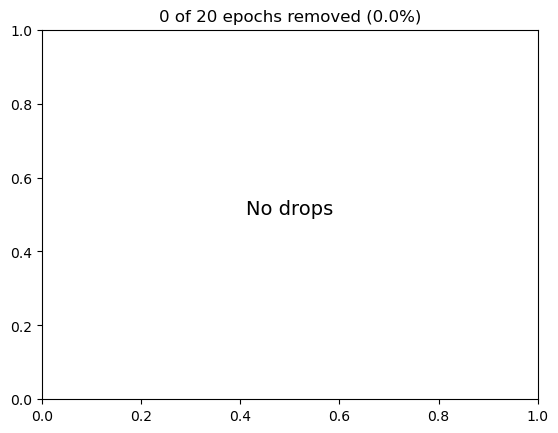

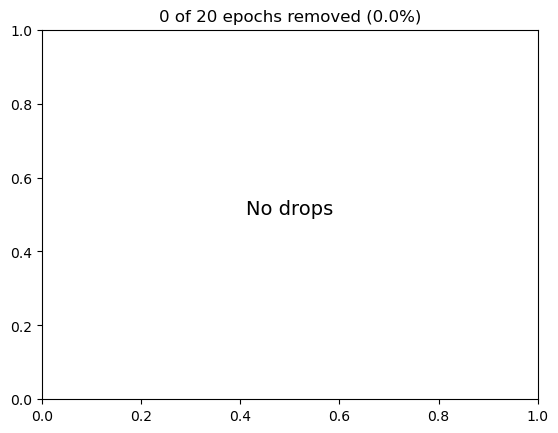

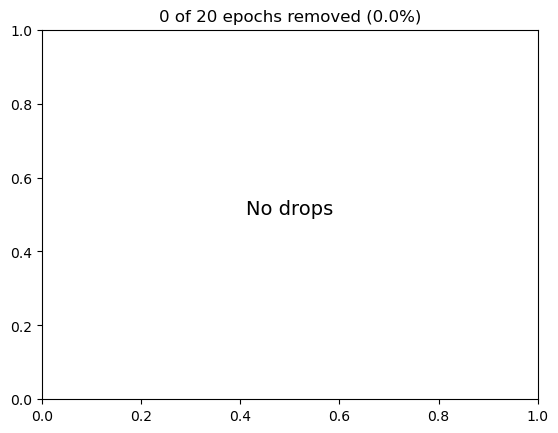

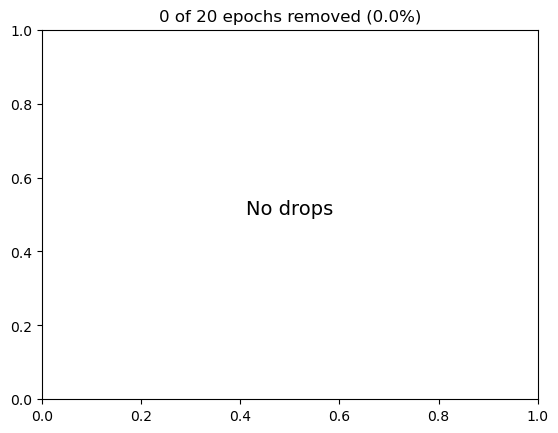

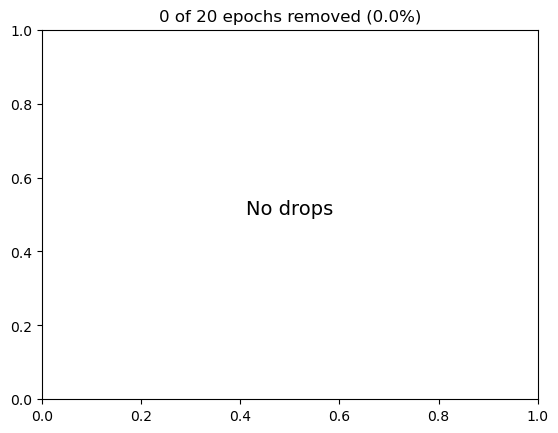

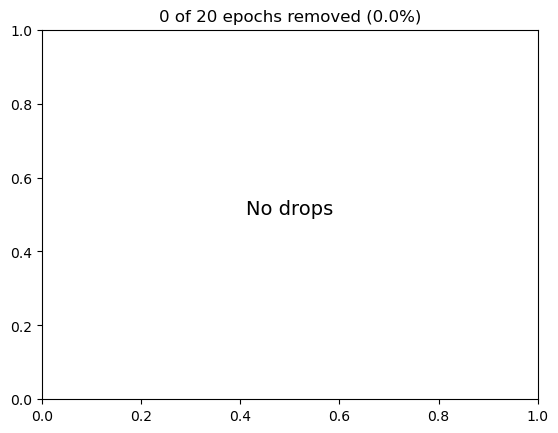

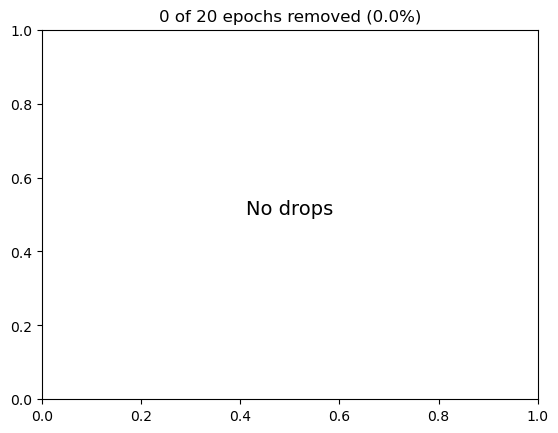

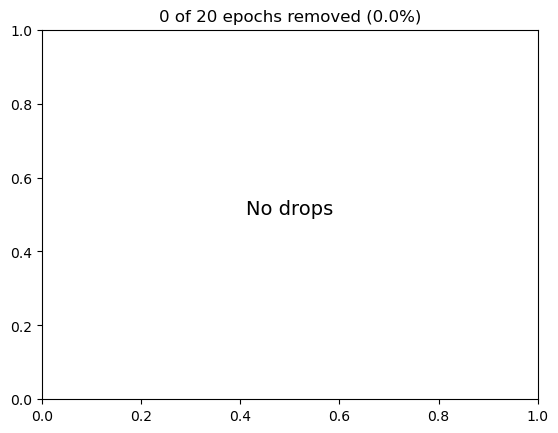

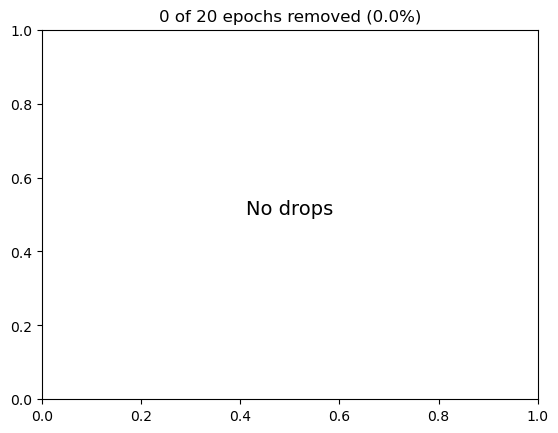

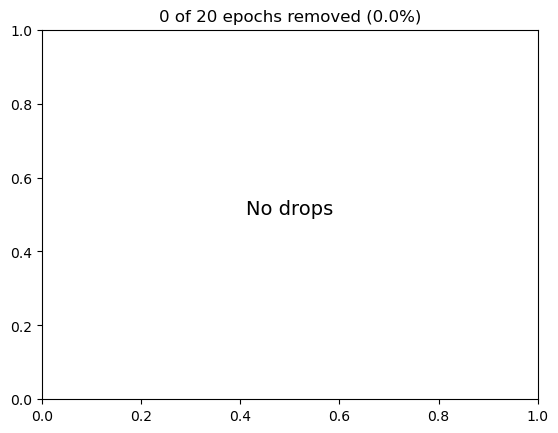

In [18]:
scores = []
for i in names:
    raw = raw_list[i]
    events = events_list[i]
    events11 = events[7:27]
    event_dict11 = {'1-back': 7}
    epochs1b = mne.Epochs(raw,events11, event_id=event_dict11, tmin= -0.2, tmax=2, preload=True,picks=['O1','O2','Fp1','Fp2','T3','T4', 'C4', 'C3'],reject=None)
    epochs1b.plot_drop_log()
    epochs1b = epochs1b.get_data()

    events1 = events[27:]
    event_dict1 = {'2-back': 10}

    epochs2b=mne.Epochs(raw,events1, event_id=event_dict1, tmin= -0.2, tmax=2, preload=True,picks=['O1','O2','Fp1','Fp2','T3','T4', 'C4', 'C3'],reject=None)
    epochs2b.plot_drop_log()
    epochs2b = epochs2b.get_data()
    
    b_epochs_labels = [1] * 20
    bb_epochs_labels = [2] * 20
    label_list=b_epochs_labels+bb_epochs_labels
    label_array=np.array(label_list)

    group_array = [0] * 5 + [1] * 5 + [2] * 5 + [3] * 5 + [4] * 5 + [5] * 5 + [6] * 5 + [7] * 5
    group_array=np.array(group_array)

    #data_list=[i for i in epochs1b]+[l for l in epochs2b]

    data_array = np.concatenate((epochs1b, epochs2b), axis=0)
    print('shapes:')
    print(data_array.shape,label_array.shape,group_array.shape)
    
    #делаем фичи - в каждой эпохе 13 параметров (типа среднего, минимального и т.д.) на каждый из 6 каналов = итого78 
    features=[]
    for data in tqdm_notebook(data_array):
        features.append(concatenate_features(data))
    features=np.array(features)
    features.shape
    
    #GridSearchCV это hyperparametric tunung, то есть чтобы подобрать идеальные параметры для классификатора
    #в данном случае подбираем только параметр С - Inverse of regularization strength;
    
    clf=LogisticRegression()
    gkf=GroupKFold(n_splits=5)
    param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}
    pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])
    gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
    gscv.fit(features,label_array,groups=group_array)
    
    print('/n/n'+i+'Results'+'/n')
    print('_________________________________________________________________________________________________________________________________________________________________________________________________________________________________')
    print('Best score:')
    print(gscv.best_score_)
    scores.append(gscv.best_score_)
    print('Best parameters:')
    print(gscv.best_params_)
    print('_________________________________________________________________________________________________________________________________________________________________________________________________________________________________')

In [19]:
print(sum(scores)/len(scores))

0.6553846153846155


## ERPs

In [7]:
event_dict = {'blinking starts': 1, 'blinking ends': 2, 'EO start': 3, 'EO end': 4,
              'EC start': 5, 'EC end': 6, '1-back': 7, '2-back': 10}


 Alice 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


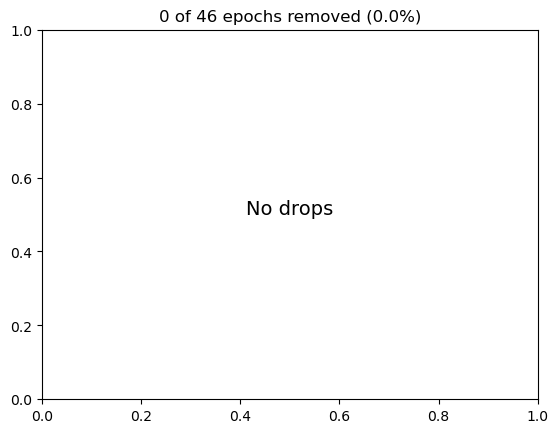

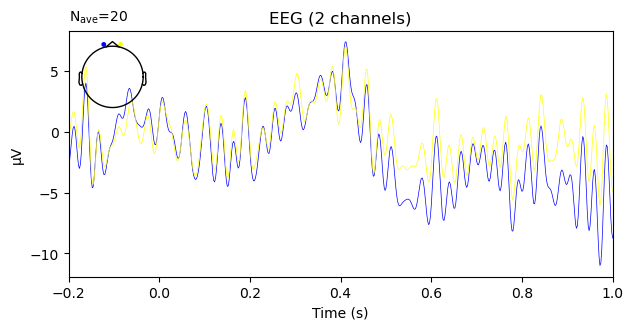

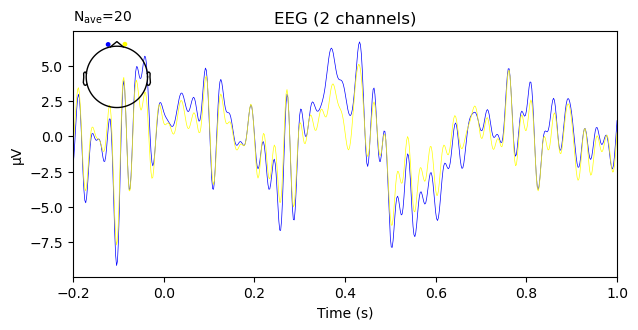


 Almaz 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


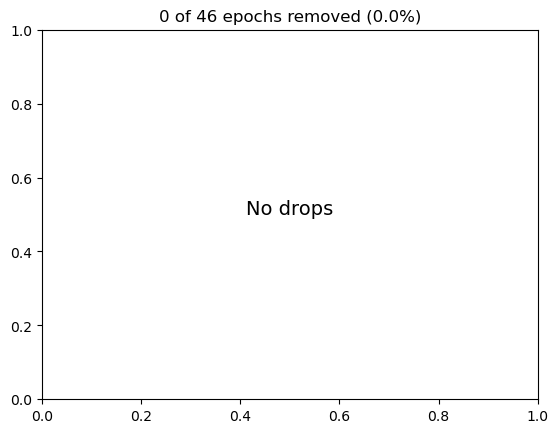

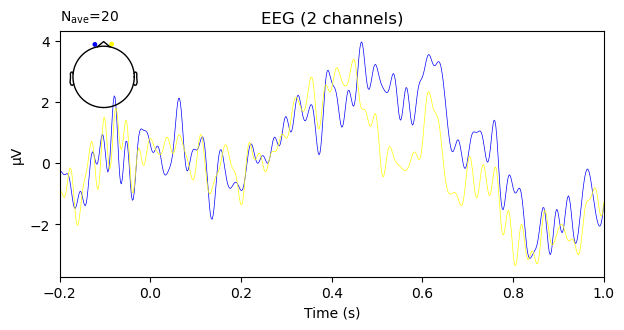

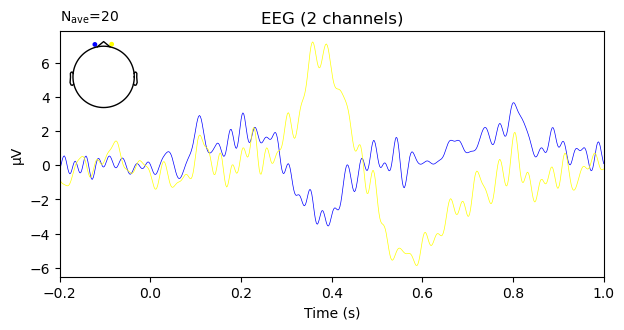


 Misha 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


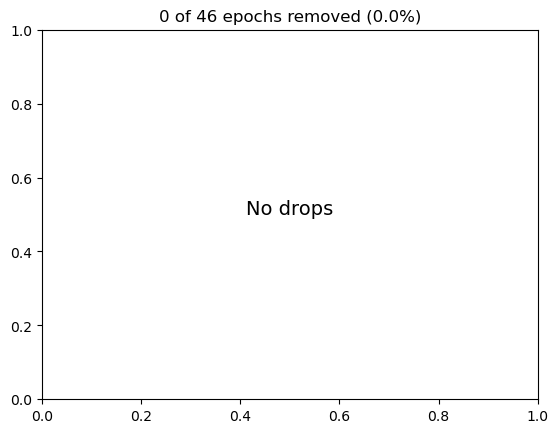

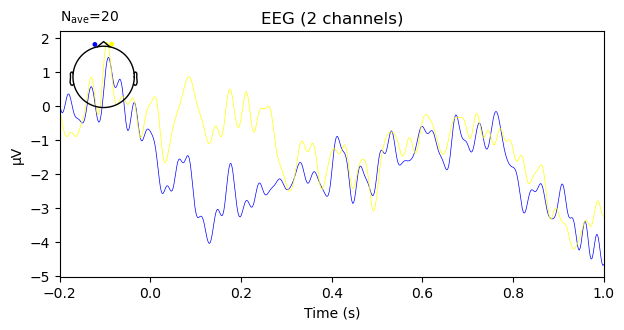

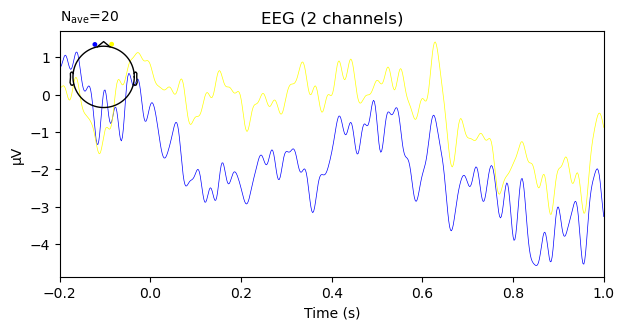


 Sasha 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


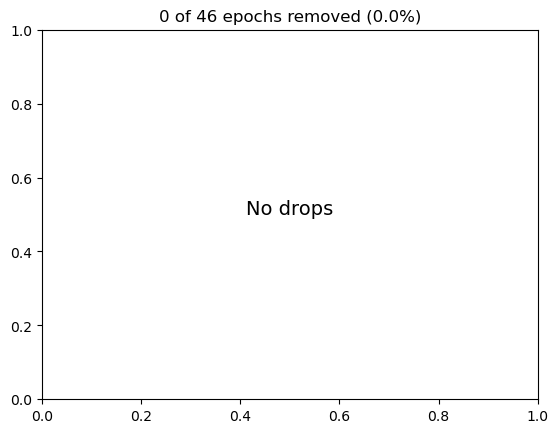

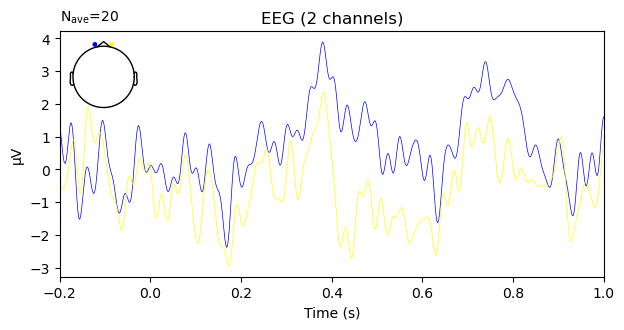

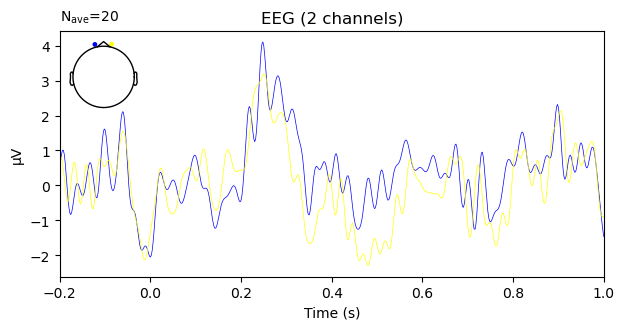


 SonyN 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


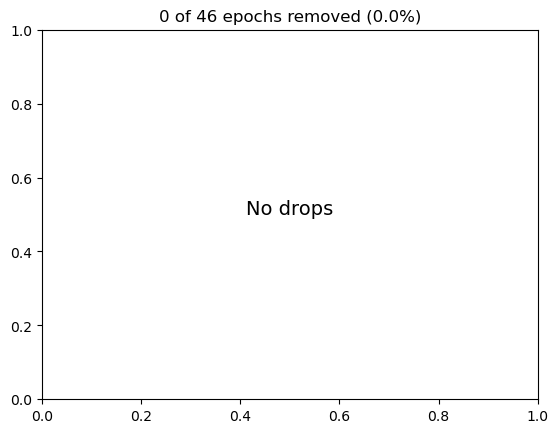

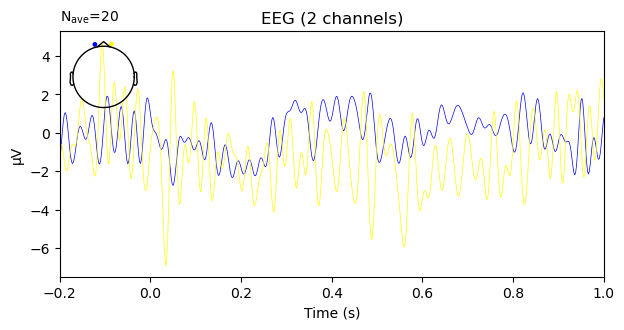

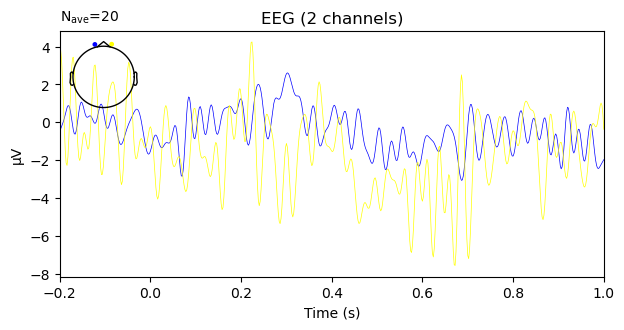


 Nasty 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


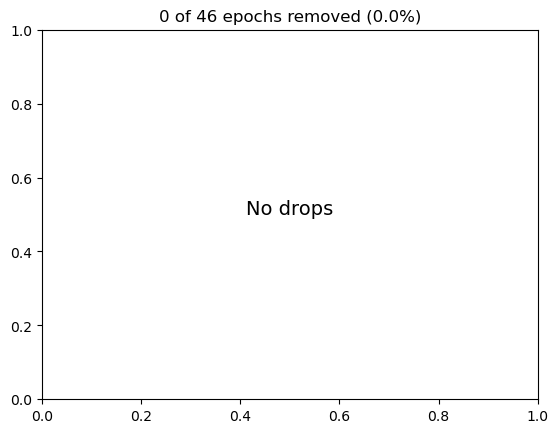

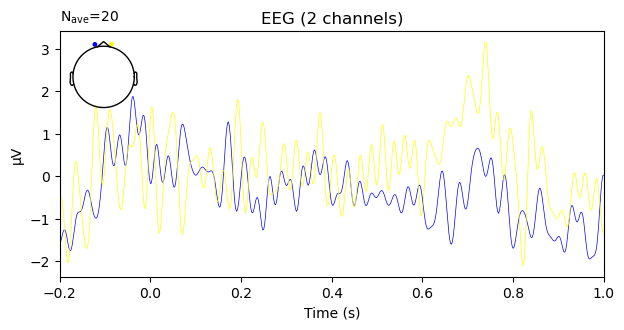

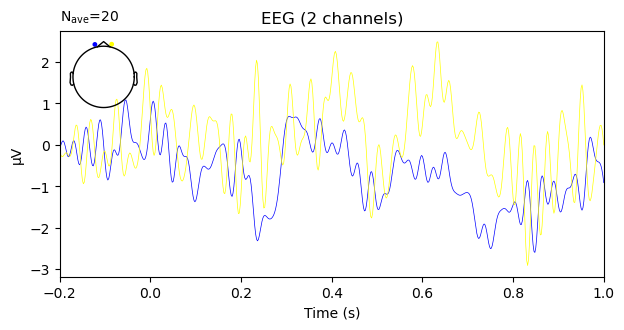


 Pilug 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


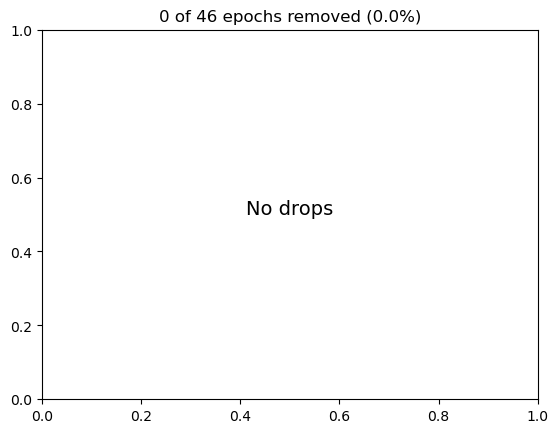

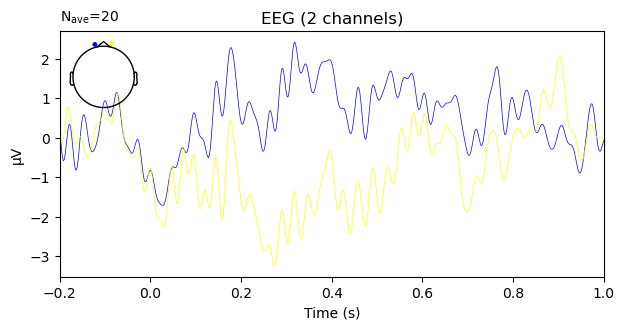

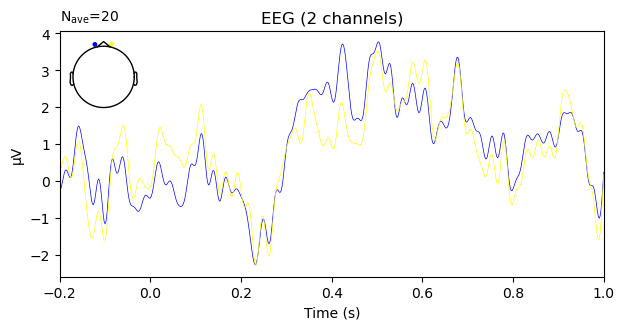


 Kurki 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


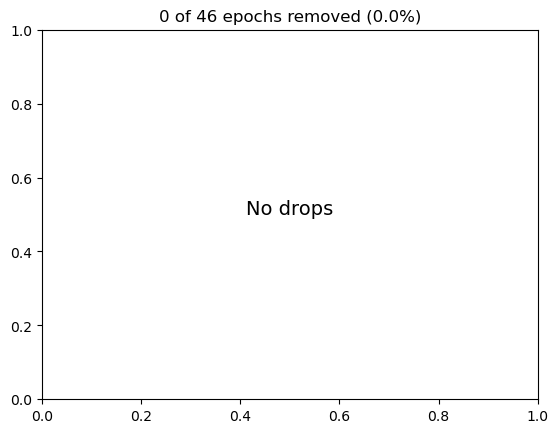

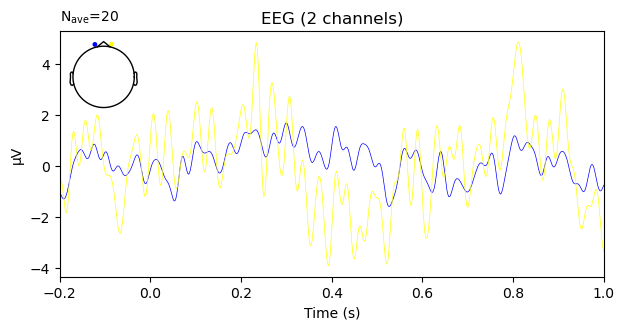

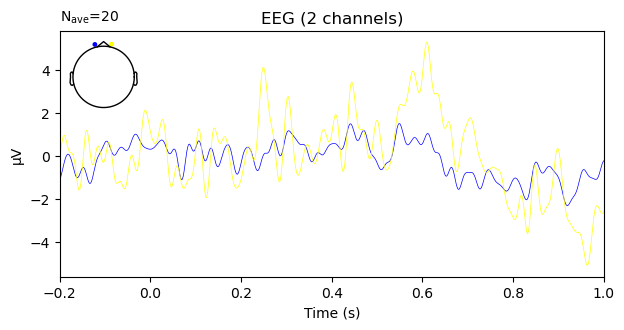


 Koblo 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


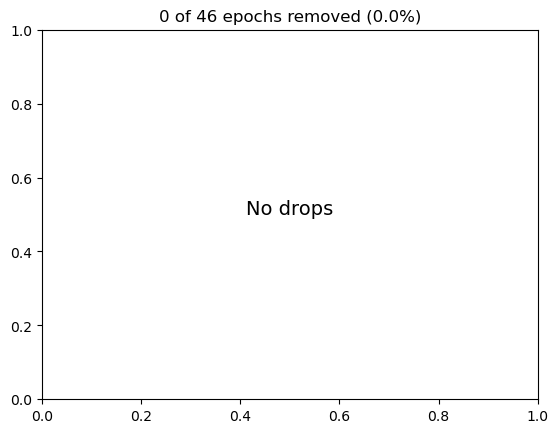

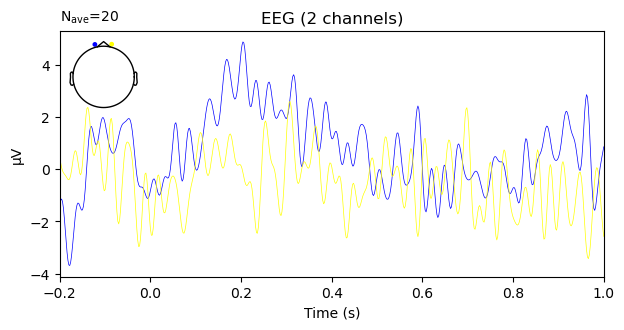

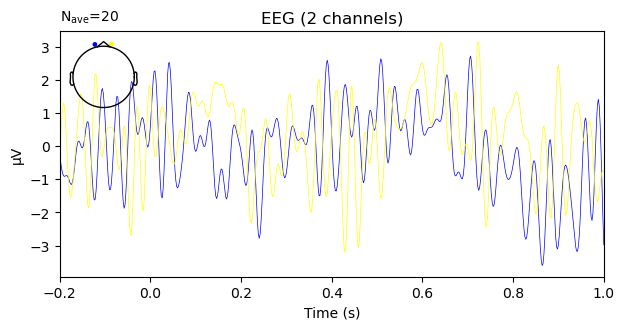


 Balts 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


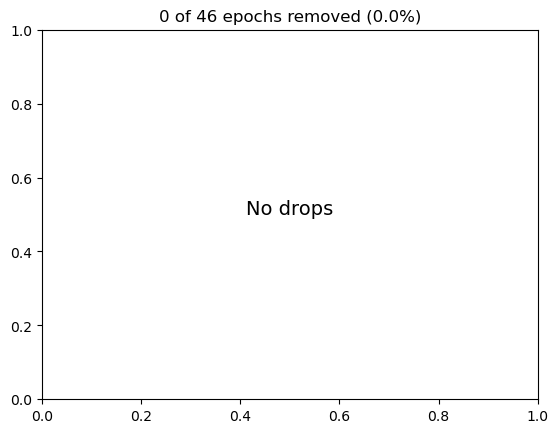

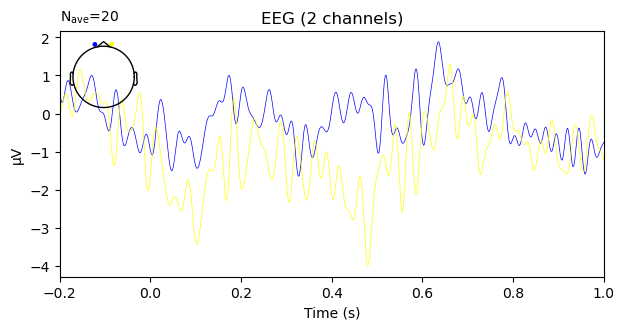

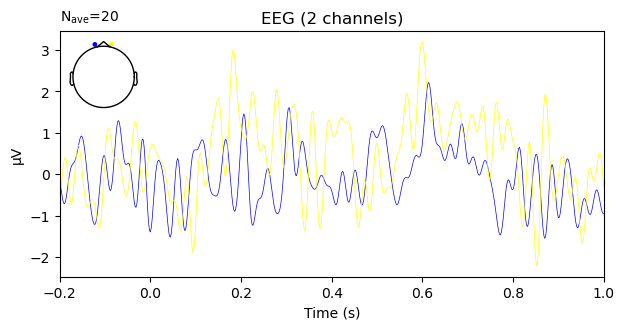


 Dolgi 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


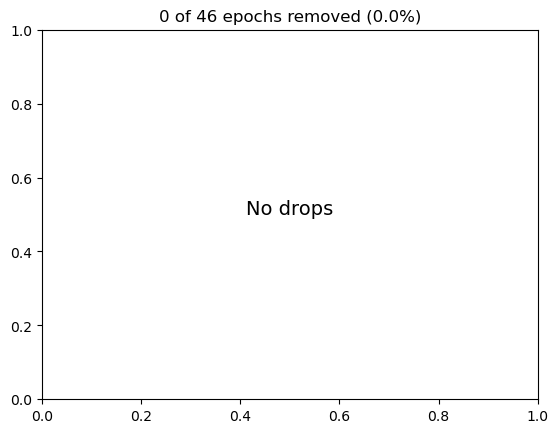

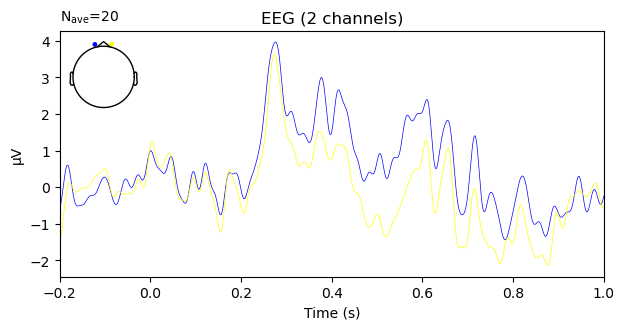

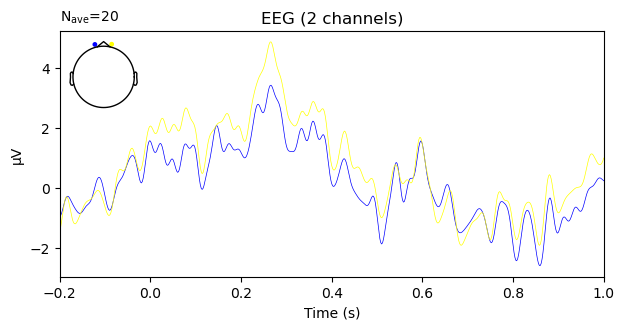


 Medve 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


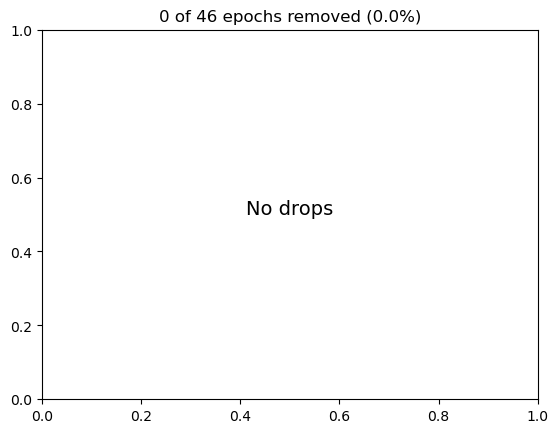

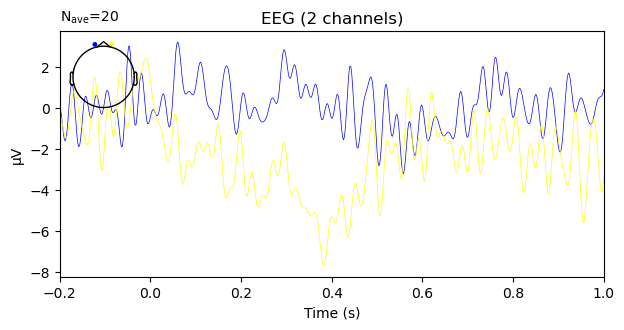

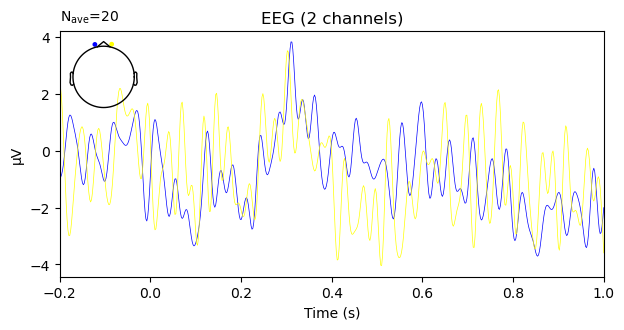


 Katya 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~1.3 MB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


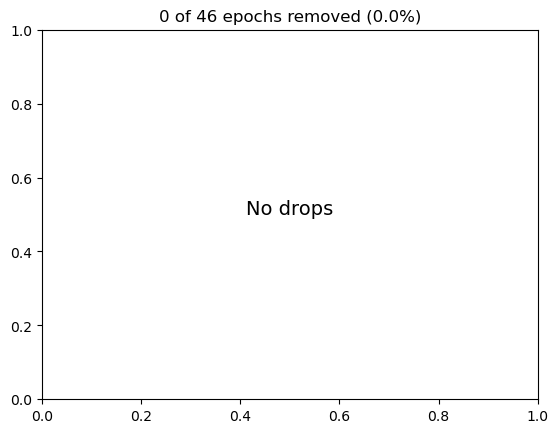

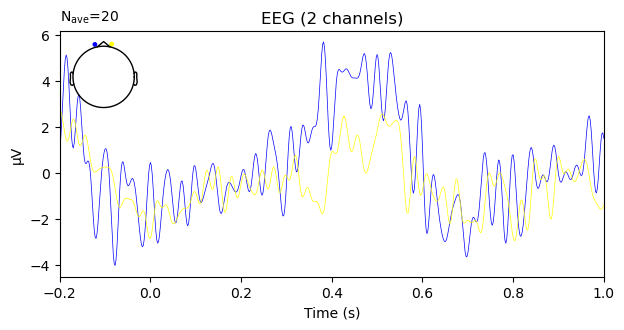

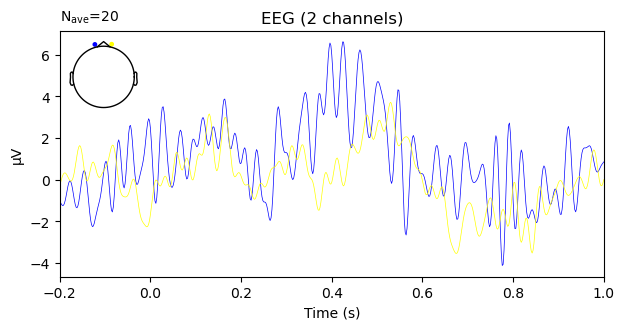

In [9]:
for i in names:
    print('\n', i, '\n')
    raw = raw_list[i]
    events = events_list[i]
    epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','Fp1','Fp2','T3','T4'],reject=None)
    epo.plot_drop_log()
    print(epo)
    oneb = epo['1-back'].average(picks=['Fp1','Fp2'])
    twob = epo['2-back'].average(picks=['Fp1','Fp2'])
    fig1 = oneb.plot()
    fig2 = twob.plot(spatial_colors=True)


 Alice 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


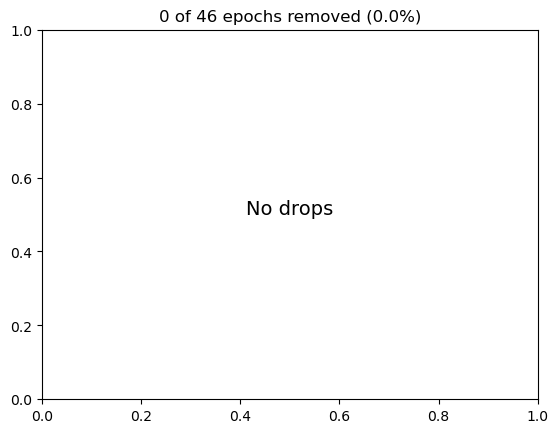

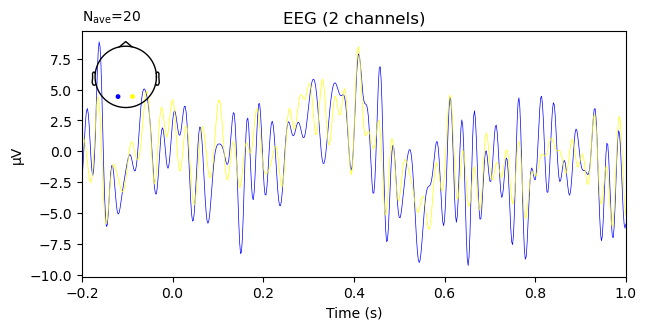

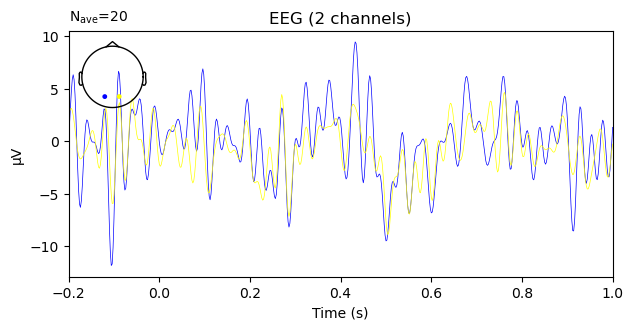


 Almaz 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


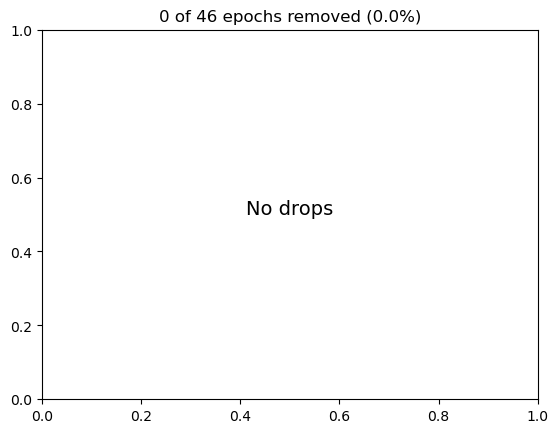

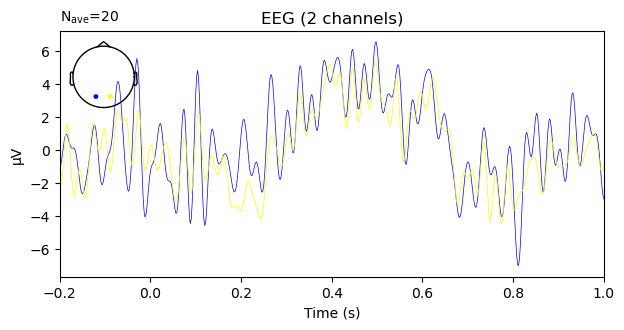

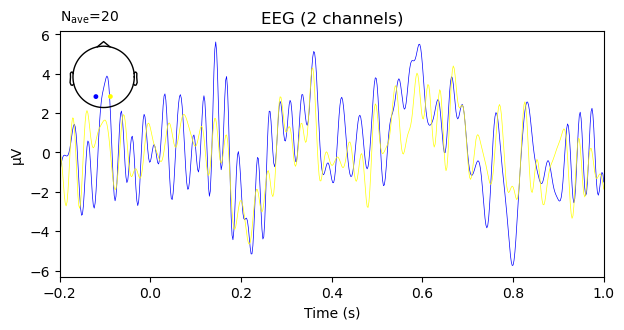


 Misha 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


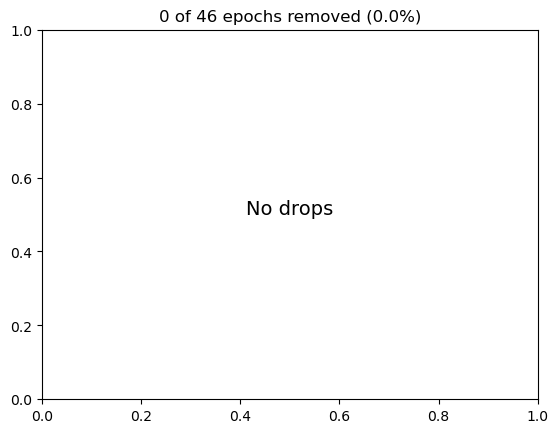

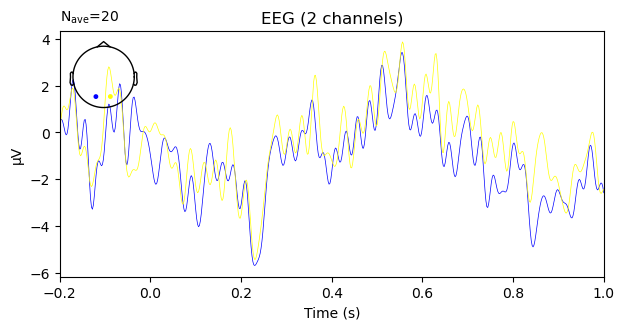

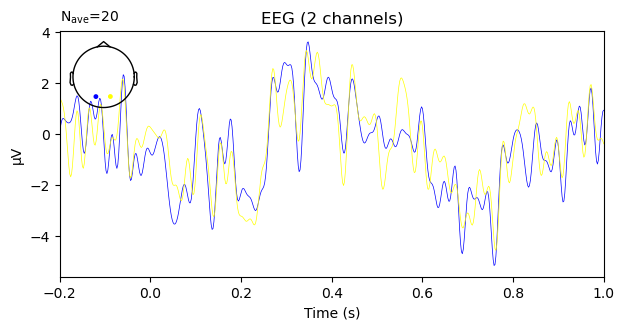


 Sasha 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


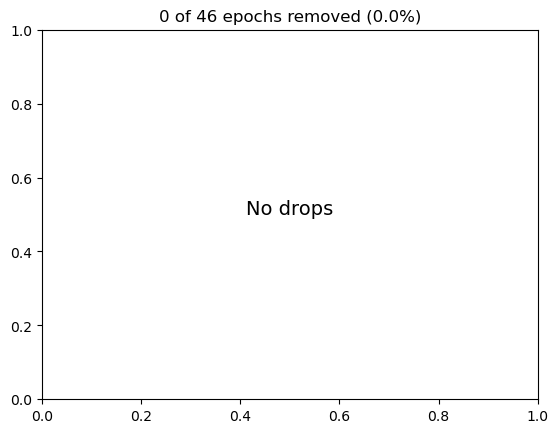

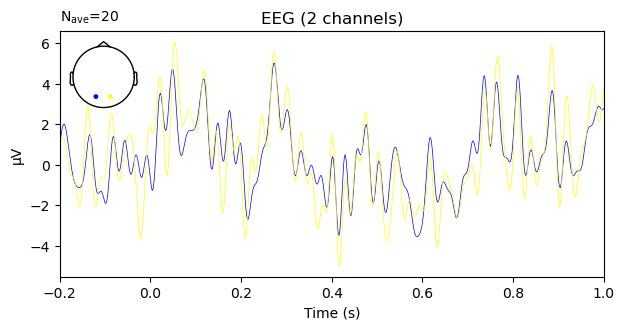

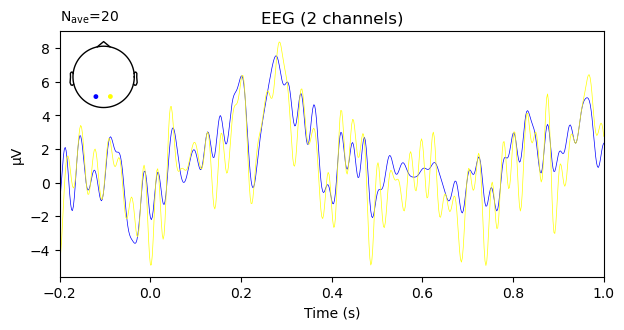


 SonyN 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


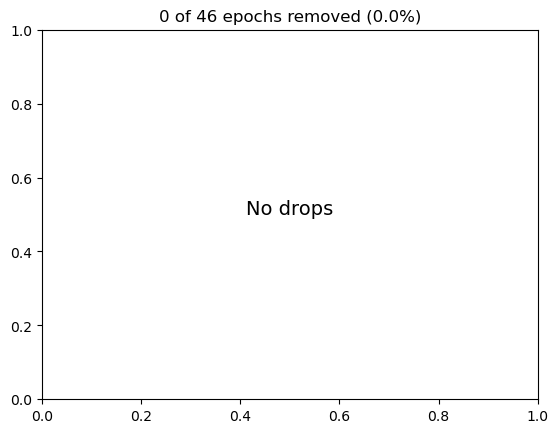

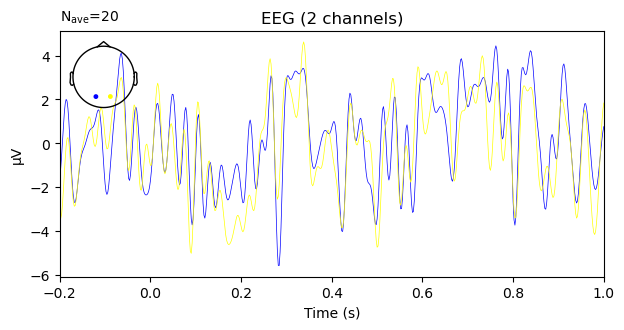

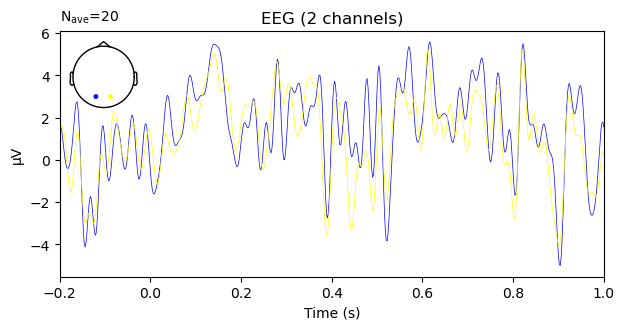


 Nasty 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


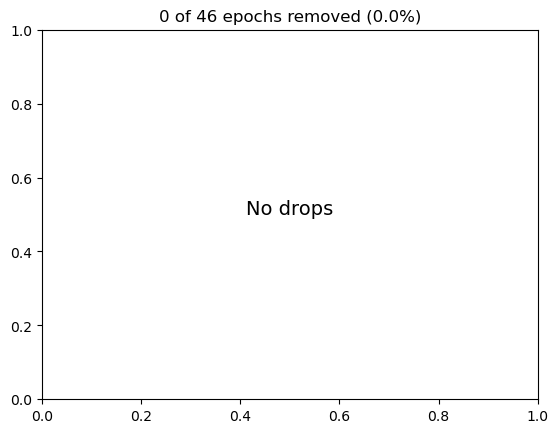

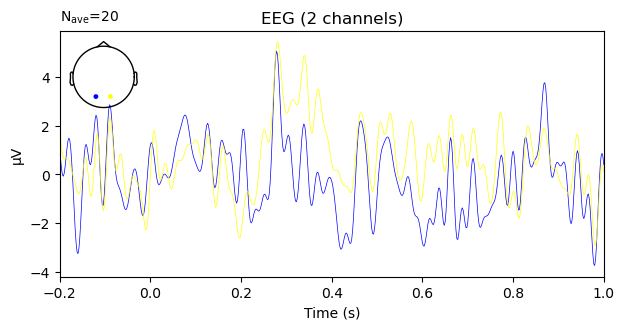

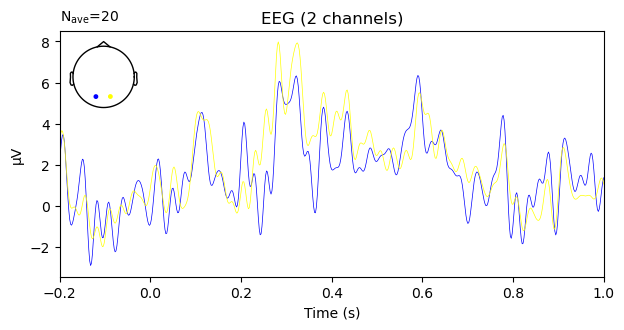


 Pilug 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


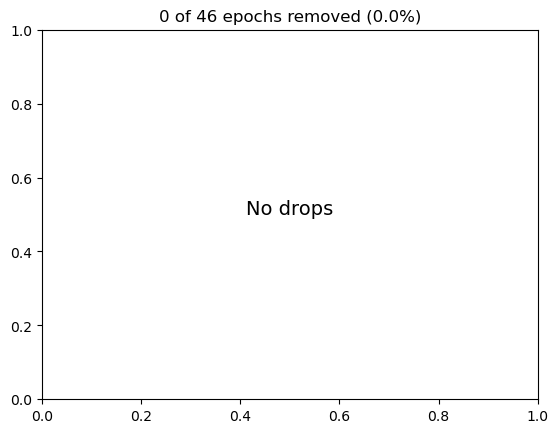

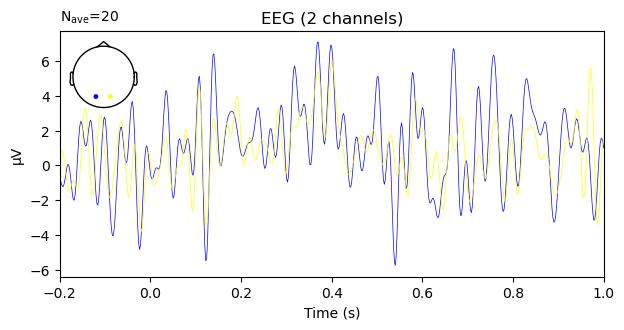

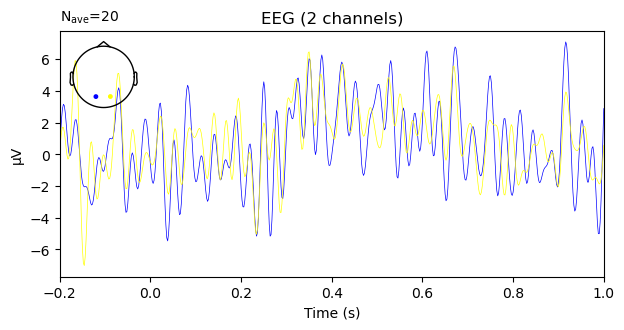


 Kurki 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


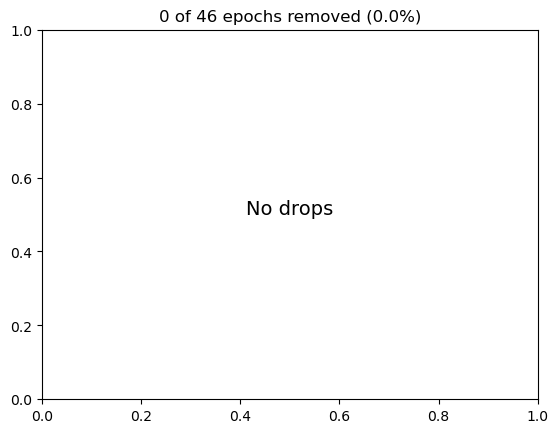

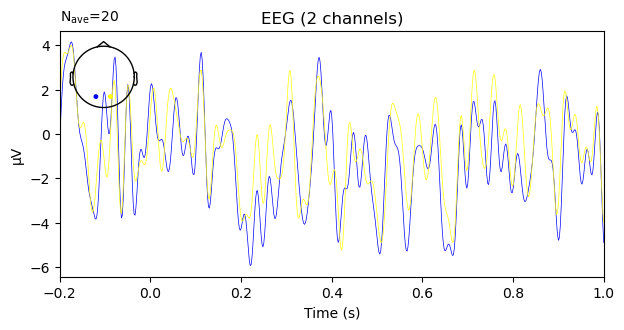

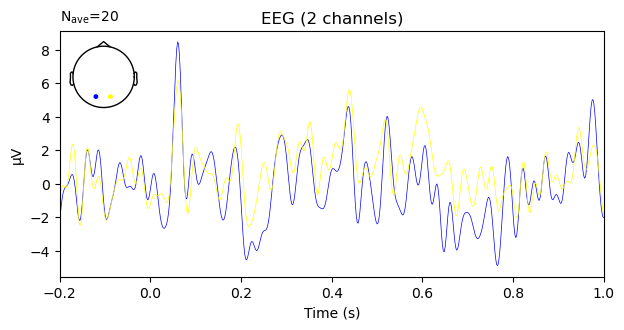


 Koblo 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


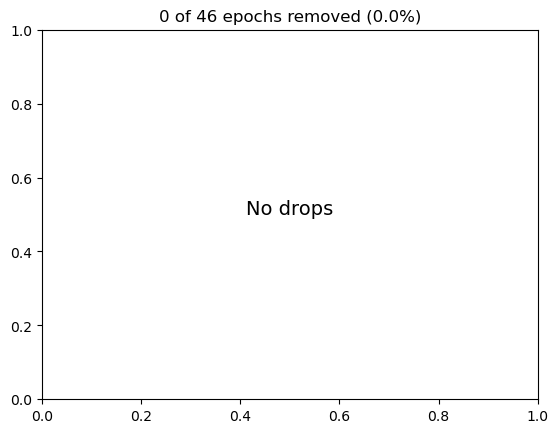

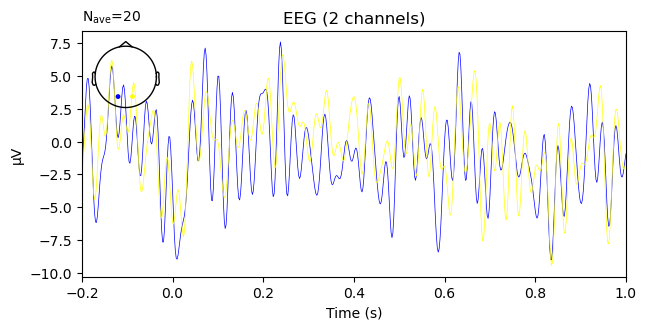

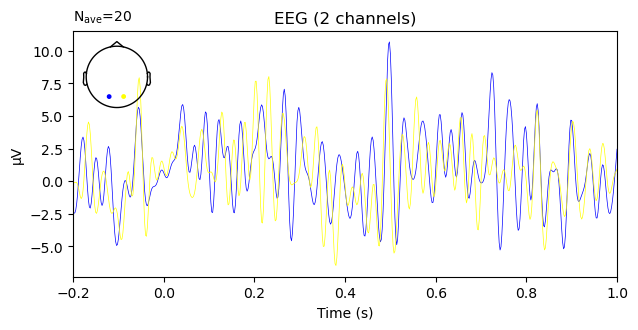


 Balts 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


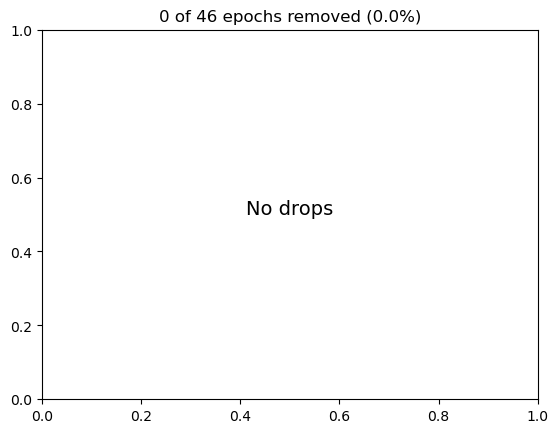

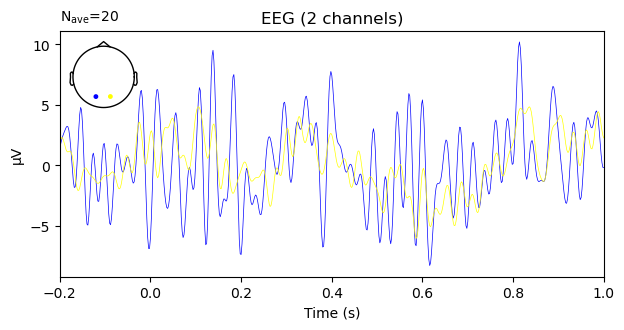

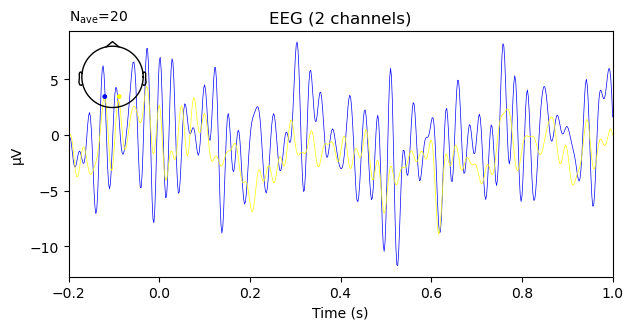


 Dolgi 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


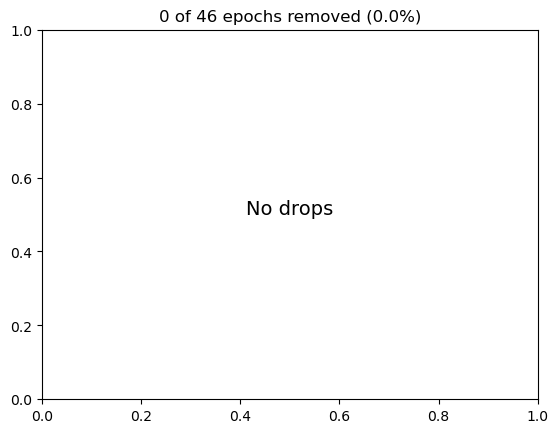

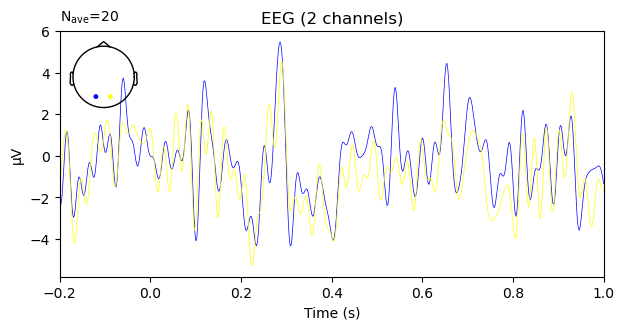

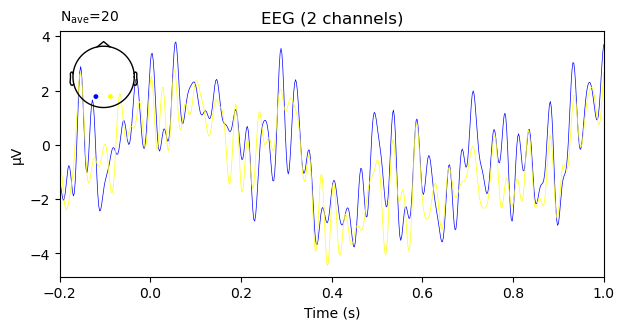


 Medve 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


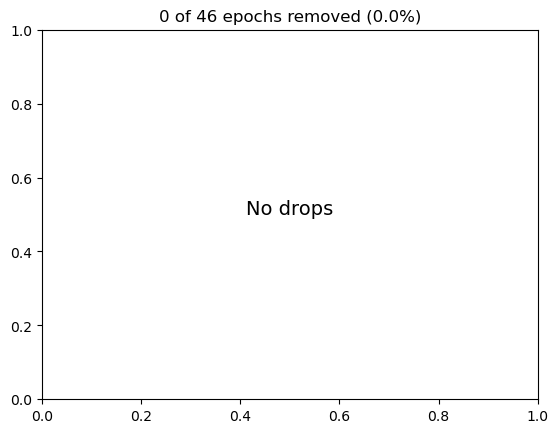

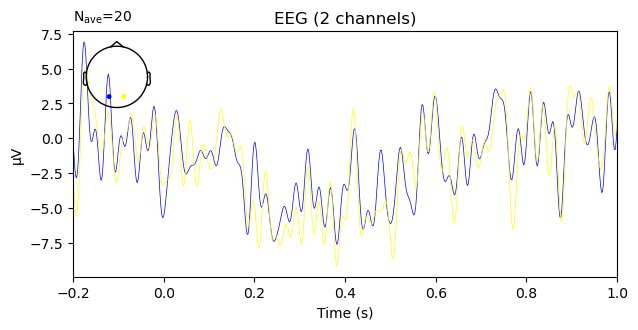

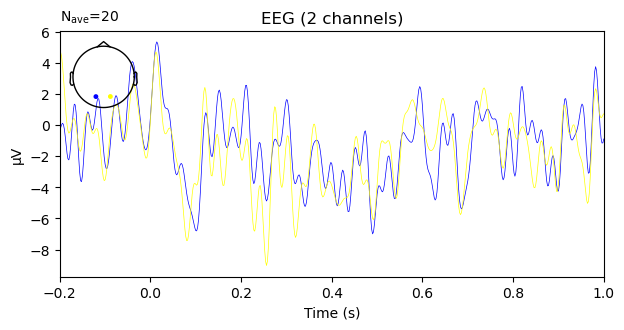


 Katya 

Not setting metadata
46 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
<Epochs |  46 events (all good), -0.2 - 1 sec, baseline -0.2 – 0 sec, ~879 kB, data loaded,
 'blinking starts': 1
 'blinking ends': 1
 'EO start': 1
 'EO end': 1
 'EC start': 1
 'EC end': 1
 '1-back': 20
 '2-back': 20>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10076\2135672055.py:5: RuntimeWarning: Channel(s) ['F3', 'F4'] could not be picked, because they are not present in the info instance.
  epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','F3','F4','T3','T4'],reject=None)


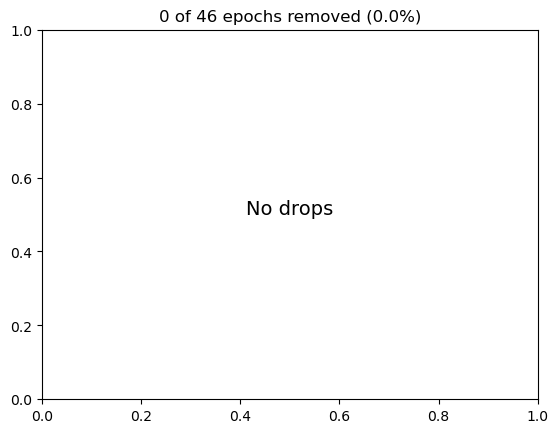

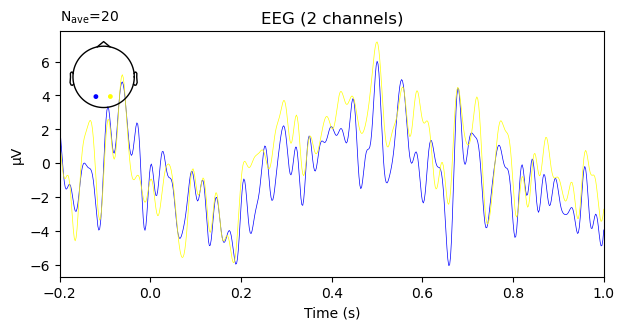

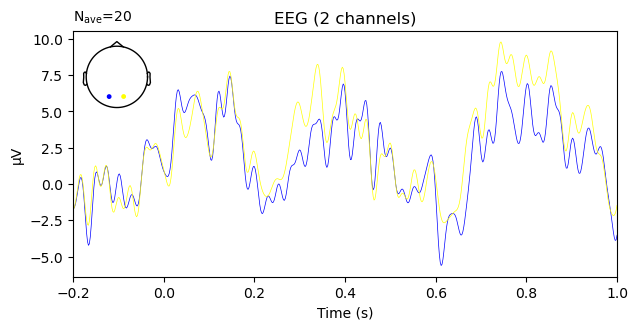

In [10]:
for i in names:
    print('\n', i, '\n')
    raw = raw_list[i]
    events = events_list[i]
    epo=mne.Epochs(raw,events, event_id=event_dict, tmin= -0.2, tmax=1, preload=True,picks=['O1','O2','Fp1','Fp2','T3','T4'],reject=None)
    epo.plot_drop_log()
    print(epo)
    oneb = epo['1-back'].average(picks=['O1','O2'])
    twob = epo['2-back'].average(picks=['O1','O2'])
    fig1 = oneb.plot()
    fig2 = twob.plot(spatial_colors=True)

## Считаем psd и колмогоров смирнов: закрытые глаза vs открытых и открытые глаза vs открытых

In [13]:
ev[1]

{'LSL 2': 1,
 'LSL 22': 2,
 'LSL 3': 3,
 'LSL 33': 4,
 'LSL 4': 5,
 'LSL 44': 6,
 'LSL 5': 7,
 'State record': 8,
 'State stop': 9,
 'LSL 6': 10}

In [14]:
events

array([[   149,      0,      8],
       [ 15157,      0,      1],
       [ 17874,      0,      2],
       [ 19719,      0,      3],
       [ 49730,      0,      4],
       [ 51671,      0,      5],
       [ 82149,      0,      6],
       [ 85580,      0,      7],
       [ 87298,      0,      7],
       [ 88752,      0,      7],
       [ 90118,      0,      7],
       [ 91489,      0,      7],
       [ 92838,      0,      7],
       [ 94310,      0,      7],
       [ 95803,      0,      7],
       [ 97173,      0,      7],
       [ 98868,      0,      7],
       [100382,      0,      7],
       [101711,      0,      7],
       [103081,      0,      7],
       [104431,      0,      7],
       [105822,      0,      7],
       [107190,      0,      7],
       [108704,      0,      7],
       [110072,      0,      7],
       [111422,      0,      7],
       [112749,      0,      7],
       [117024,      0,     10],
       [118783,      0,     10],
       [120273,      0,     10],
       [12

In [16]:
diff = 0
equa = 0
for i in names:
    print('\n', i, '\n')
    raw = raw_list[i]
    events = events_list[i]
    if events[3][2] == 3:
        eot1 = events[3][0] / raw.info['sfreq']
        eot2 = events[4][0] / raw.info['sfreq']
        print('eo')
        print(eot1,eot2)
        raw_eo = raw.copy().crop(tmin=eot1, tmax=eot2)
    if events[5][2] == 5:
        print('ec')
        ect1 = events[5][0] / raw.info['sfreq']
        ect2 = events[6][0] / raw.info['sfreq']
        print(ect1,ect2)
        raw_ec = raw.copy().crop(tmin=ect1, tmax=ect2)
    #raw_ec.plot(events=events)
    #raw_eo.plot(events=events)
    psd_ecl = raw_ec.compute_psd(picks=['O1','O2'],fmin=8,fmax=12)
    psd_ecl_lil = np.concatenate([psd_ecl._data[0], psd_ecl._data[1]])
    psd_eol = raw_eo.compute_psd(picks=['O1','O2'],fmin=8,fmax=12)
    psd_eol_lil = np.concatenate([psd_eol._data[0], psd_eol._data[1]])
    ans1 = str(scipy.stats.kstest(psd_ecl_lil, psd_eol_lil))
    nbeg = ans1.rfind('e=')
    print(ans1)
    ans1 = ans1.replace("e", "E" )
    nbeg += 2
    nend = len(ans1) - 1
    p = float(ans1[nbeg:nend])
    p = round(p, 5)
    if p < 0.05:
        ans = 'different'
        diff += 1
    else:
        ans = 'equal'
        equa += 1
    print(p,ans,sep='\n')
print('total number of different:', diff)
print('total number of equal:', equa)


 Alice 

eo
64.88 124.898
ec
127.962 188.952
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Almaz 

eo
30.99 90.984
ec
94.536 155.532
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Misha 

eo
51.45 111.46
ec
122.95 183.948
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Sasha 

eo
51.246 111.248
ec
114.108 175.102
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 SonyN 

eo
27.604 87.596
ec
90.748 151.764
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
KstestResult(statistic=1.0, pvalue=0.028571428571428577)
0.02857
different

 Nasty 

eo
28.544 88.526
ec
90.938 151.904
Effective wind

### Plot psd

In [24]:
diff = 0
equa = 0
for i in names:
    print('\n', i, '\n')
    raw = raw_list[i]
    events = events_list[i]
    if events[3][2] == 3:
        eot1 = events[3][0] / raw.info['sfreq']
        eot2 = events[4][0] / raw.info['sfreq']
        print(eot1,eot2)
        raw_eo = raw.copy().crop(tmin=eot1, tmax=eot2)
    if events[5][2] == 5:
        ect1 = events[5][0] / raw.info['sfreq']
        ect2 = events[6][0] / raw.info['sfreq']
        print(ect1,ect2)
        raw_ec = raw.copy().crop(tmin=ect1, tmax=ect2)
    #raw_ec.plot(events=events)
    #raw_eo.plot(events=events)
    psd_ecl = raw_ec.compute_psd(picks=['O1', 'O2'], fmin=0, fmax=60)
    psd_eol = raw_eo.compute_psd(picks=['O1', 'O2'], fmin=0, fmax=60)
    print('eyes open')
    psd_eol.plot()
    plt.savefig('C:\\Users\\Lenovo\\1easyEEG\\psd\\' + i + '_NVX_EO.png')
    print('eyes closed')
    psd_ecl.plot()
    plt.savefig('C:\\Users\\Lenovo\\1easyEEG\\psd\\' + i + '_NVX_EC.png')


 Alice 

64.88 124.898
127.962 188.952
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open
eyes closed


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)



 Almaz 

30.99 90.984
94.536 155.532
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open
eyes closed


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)



 Misha 

51.45 111.46
122.95 183.948
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes closed

 Sasha 

51.246 111.248
114.108 175.102
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes closed

 SonyN 

27.604 87.596
90.748 151.764
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes open


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes closed

 Nasty 

28.544 88.526
90.938 151.904
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open
eyes closed


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)



 Pilug 

51.336 111.32
118.864 179.82
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open
eyes closed


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)



 Kurki 

31.688 91.696
101.32 162.318
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes open
eyes closed


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)



 Koblo 

25.872 85.866
92.55 153.568
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes closed

 Balts 

32.184 92.15
96.102 157.11
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes open
eyes closed

 Dolgi 

25.692 85.702
96.604 157.56
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes closed
Need more than one channel to make topography for eeg. Disabling interactivity.

 Medve 

92.832 152.858
155.35 216.344
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


eyes closed

 Katya 

39.438 99.46
103.342 164.298
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
eyes open
eyes closed


C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Lenovo\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


## Epochs

In [26]:
epo=mne.Epochs(raw, events, event_id=ev[1], tmin= -0.2, tmax=1, preload=True,reject=None)

Not setting metadata
48 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 601 original time points ...
0 bad epochs dropped


In [158]:
%matplotlib

Using matplotlib backend: QtAgg


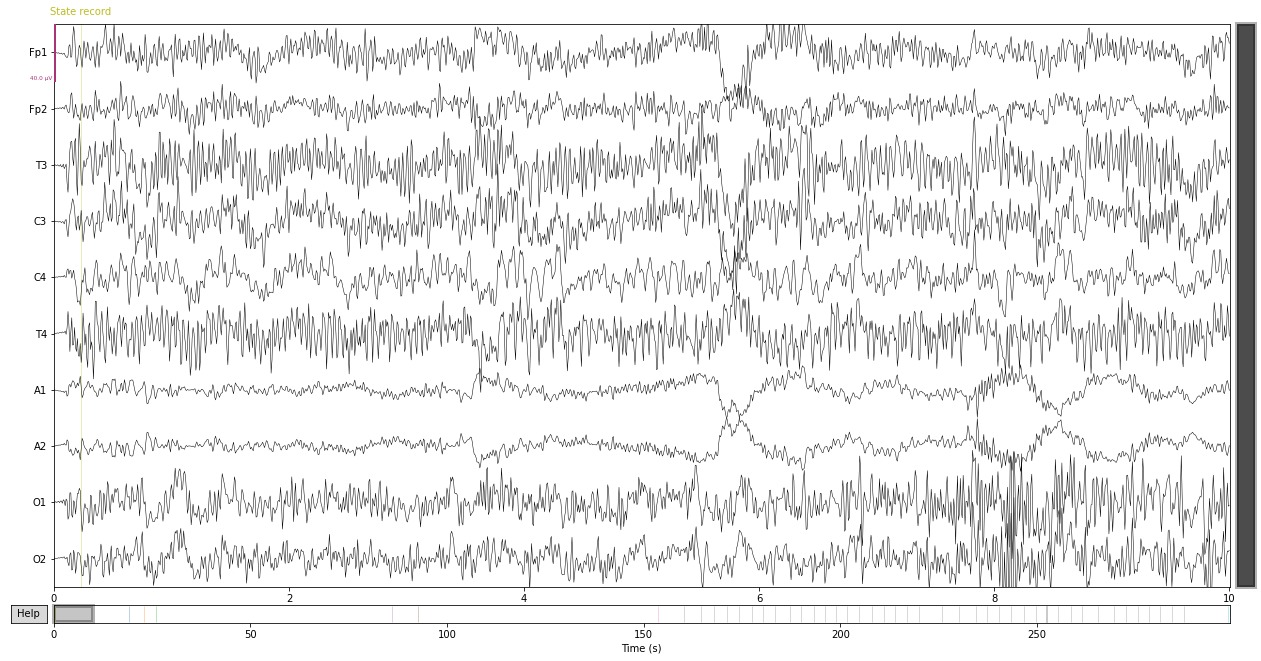

In [160]:
raw.plot()

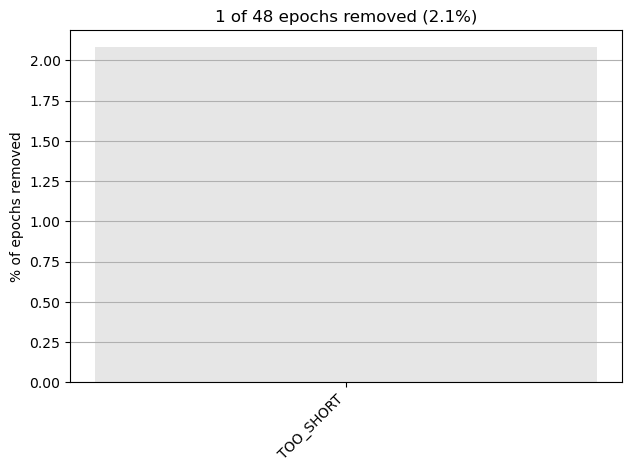

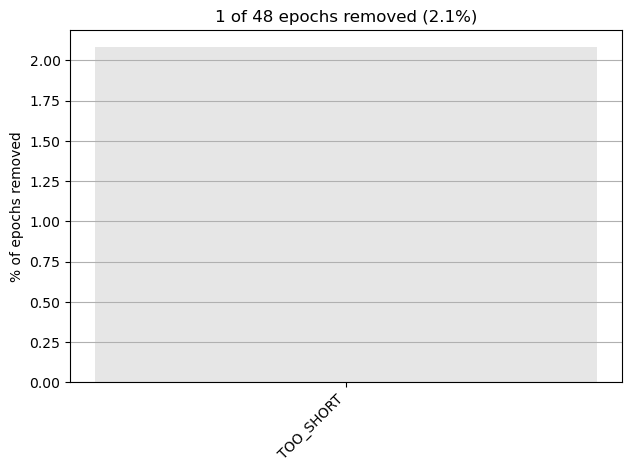

In [19]:
epo.plot_drop_log()

In [20]:
ev[1]

{'LSL 2': 1,
 'LSL 22': 2,
 'LSL 3': 3,
 'LSL 33': 4,
 'LSL 4': 5,
 'LSL 44': 6,
 'LSL 5': 7,
 'State record': 8,
 'State stop': 9,
 'LSL 6': 10}

In [164]:
%matplotlib inline

Channels marked as bad:
none


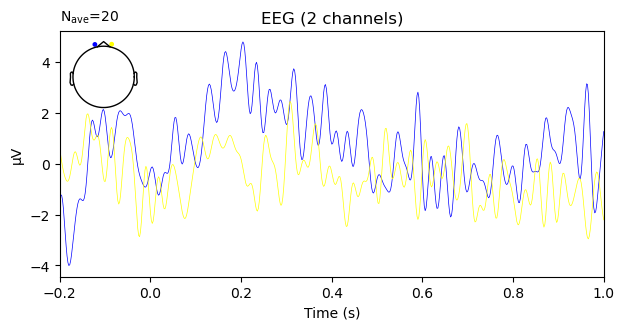

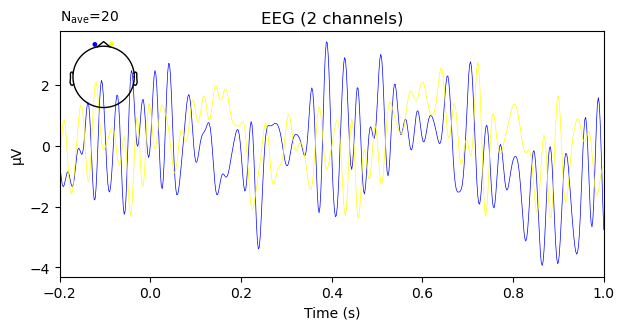

In [21]:
oneb = epo['LSL 5'].average(picks=['Fp1','Fp2'])
twob = epo['LSL 6'].average(picks=['Fp1','Fp2'])
fig1 = oneb.plot()
fig2 = twob.plot(spatial_colors=True)

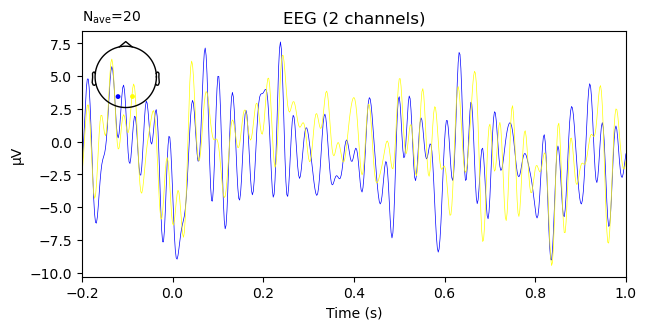

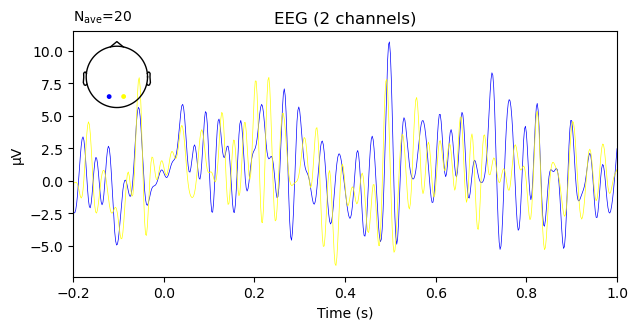

In [22]:
oneb = epo['LSL 5'].average(picks=['O1','O2'])
twob = epo['LSL 6'].average(picks=['O1','O2'])
fig1 = oneb.plot()
fig2 = twob.plot(spatial_colors=True)

In [161]:
ch = ['Fp1', 'Fp2', 'T3', 'C3', 'C4', 'T4', 'O1', 'O2', 'A1', 'A2']

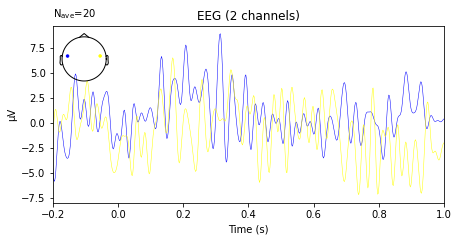

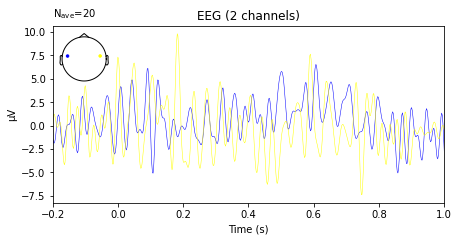

In [166]:
oneb = epo['LSL 5'].average(picks=['T3', 'T4'])
twob = epo['LSL 6'].average(picks=['T3', 'T4'])
fig1 = oneb.plot()
fig2 = twob.plot(spatial_colors=True)